#**Importing Libraries And Mounting Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import joblib
from joblib import load
from scipy.stats import shapiro, uniform, randint
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, accuracy_score, recall_score, precision_score, average_precision_score, roc_auc_score, roc_curve, balanced_accuracy_score, cohen_kappa_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
# Reading and Loading the dataset
df = pd.read_excel('/content/drive/MyDrive/Convolve 2.0/Dev_data_to_be_shared.xlsx')

In [4]:
# Reading and Loading the Validation dataset
val_df = pd.read_excel('/content/drive/MyDrive/Convolve 2.0/validation_data_to_be_shared.xlsx')

In [5]:
df.head()

,Primary key,Target,account_opening_date,country_code,demog_1,demog_2,income,demog_3,city_tier,occupation,...,demog_39,email_domain,demog_40,demog_41,others_42,others_43,others_44,others_45,demog_42,demog_43
0,1,0,2023-02-18,IN,53.0,3,100001 to 5L,101.0,Rural,Self_Employed,...,1,gmail,low,1,NaN,0.0,NaN,NaN,1,medium
1,2,0,2023-02-01,IN,55.0,1,0 to 1L,101.0,Tier 1,Salaried,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
2,3,0,2022-12-09,IN,55.0,3,0 to 1L,101.0,Tier 2,Self_Employed,...,1,gmail,medium,1,NaN,NaN,NaN,NaN,1,High
3,4,0,2023-03-31,IN,53.0,3,100001 to 5L,101.0,Tier 7,Self_Employed,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
4,5,0,2023-01-17,IN,55.0,6,0 to 1L,101.0,Tier 1,Student,...,1,gmail,low,1,NaN,NaN,NaN,NaN,1,medium


In [6]:
val_df.head()

,Primary key,account_opening_date,country_code,demog_1,demog_2,income,demog_3,city_tier,occupation,demog_4,...,demog_39,email_domain,demog_40,demog_41,others_42,others_43,others_44,others_45,demog_42,demog_43
0,9000001,2023-03-25,IN,56.0,2,5L to 10L,101.0,Tier 7,Self_Employed,N,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
1,9000002,2023-01-15,IN,55.0,1,100001 to 5L,101.0,Tier 5,Salaried,N,...,1,gmail,low,1,NaN,NaN,NaN,NaN,1,medium
2,9000003,2023-01-06,IN,55.0,1,100001 to 5L,101.0,Tier 1,Other,N,...,1,gmail,low,1,NaN,NaN,NaN,NaN,1,medium
3,9000004,2023-02-08,IN,55.0,1,100001 to 5L,101.0,Tier 1,Other,N,...,1,gmail,medium,1,NaN,0.0,NaN,NaN,1,High
4,9000005,2023-01-27,IN,55.0,1,100001 to 5L,101.0,Tier 5,Other,N,...,1,gmail,low,1,NaN,NaN,NaN,NaN,1,High


In [236]:
# Info of the dataset
df.info()

# Making a copy of the Dataset to work with
df_new = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 178 entries, Primary key to demog_43
dtypes: datetime64[ns](1), float64(147), int64(18), object(12)
memory usage: 135.8+ MB


In [237]:
vl_df = val_df.copy()

#**EDA**

In [238]:
df_new.columns.tolist()

['Primary key',
 'Target',
 'account_opening_date',
 'country_code',
 'demog_1',
 'demog_2',
 'income',
 'demog_3',
 'city_tier',
 'occupation',
 'demog_4',
 'demog_5',
 'demog_6',
 'demog_7',
 'demog_8',
 'demog_9',
 'demog_10',
 'demog_11',
 'demog_12',
 'demog_13',
 'demog_14',
 'demog_15',
 'demog_16',
 'demog_17',
 'demog_18',
 'demog_19',
 'demog_20',
 'demog_21',
 'demog_22',
 'os',
 'txn_1',
 'txn_2',
 'txn_3',
 'txn_4',
 'txn_5',
 'txn_6',
 'txn_7',
 'txn_8',
 'txn_9',
 'txn_10',
 'txn_11',
 'txn_12',
 'txn_13',
 'txn_14',
 'txn_15',
 'txn_16',
 'txn_17',
 'txn_18',
 'txn_19',
 'txn_20',
 'txn_21',
 'txn_22',
 'txn_23',
 'txn_24',
 'txn_25',
 'txn_26',
 'txn_27',
 'txn_28',
 'txn_29',
 'txn_30',
 'txn_31',
 'txn_32',
 'txn_33',
 'txn_34',
 'txn_35',
 'txn_36',
 'txn_37',
 'txn_38',
 'txn_39',
 'txn_40',
 'txn_41',
 'txn_42',
 'txn_43',
 'txn_44',
 'txn_45',
 'txn_46',
 'txn_47',
 'txn_48',
 'txn_49',
 'txn_50',
 'txn_51',
 'txn_52',
 'txn_53',
 'txn_54',
 'txn_55',
 'txn_56',


In [239]:
columns_for_EDA = {'account_opening_date','country_code','income','city_tier','occupation','os','email_domain'}

In [240]:
# Convert the datetime_column to a numeric representation (e.g., year, month, day)
df_new['year'] = df_new['account_opening_date'].dt.year
df_new['month'] = df_new['account_opening_date'].dt.month
df_new['day'] = df_new['account_opening_date'].dt.day

In [241]:
# Convert the datetime_column to a numeric representation (e.g., year, month, day)
vl_df['year'] = vl_df['account_opening_date'].dt.year
vl_df['month'] = vl_df['account_opening_date'].dt.month
vl_df['day'] = vl_df['account_opening_date'].dt.day


In [242]:
# Convert the 'datetime' column to datetime if it's not already in datetime format
df_new['account_opening_date'] = pd.to_datetime(df_new['account_opening_date'])

# Get the range of dates in the 'datetime' column
min_date = df_new['account_opening_date'].min()
max_date = df_new['account_opening_date'].max()

print(f"The range of dates in the 'date_n_time' column is from {min_date} to {max_date}")

The range of dates in the 'date_n_time' column is from 2022-12-01 00:00:00 to 2023-03-31 00:00:00


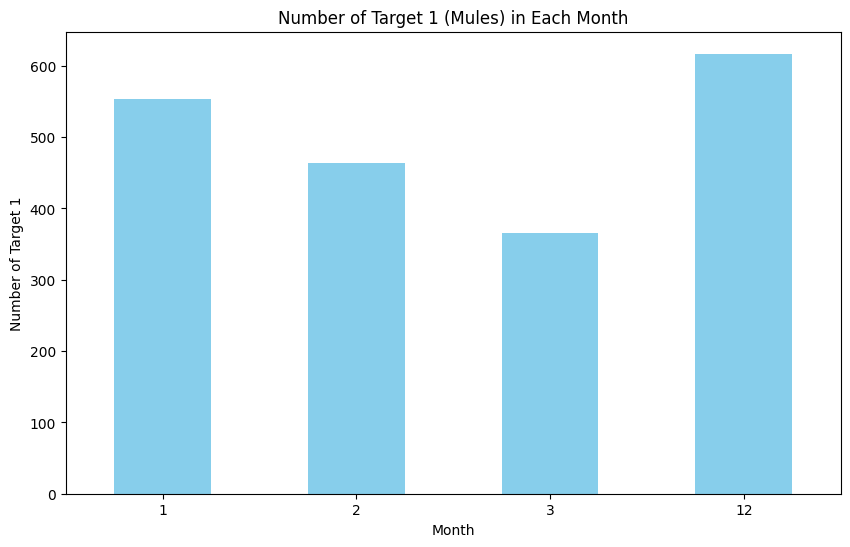

In [243]:
# Group by 'month' and count the occurrences of target 1 in each month
monthly_counts = df_new[df_new['Target'] == 1].groupby('month').size()

# Plot the graph
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Target 1 (Mules) in Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Target 1')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


In [244]:
# Create a new column for the day of the week
df_new['day of week'] = df_new['account_opening_date'].dt.day_name()

df_new['day of week']

0         Saturday
1        Wednesday
2           Friday
3           Friday
4          Tuesday
           ...    
99995    Wednesday
99996       Friday
99997     Thursday
99998       Friday
99999       Friday
Name: day of week, Length: 100000, dtype: object

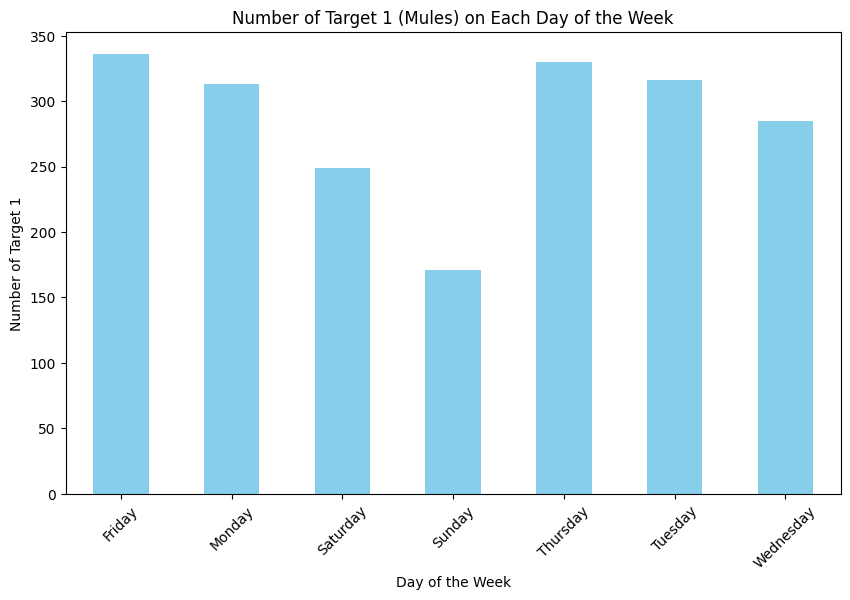

In [245]:
# Group by 'day_of_week' and count the occurrences of target 1 in each day of the week
daily_counts = df_new[df_new['Target'] == 1].groupby('day of week').size()

# Plot the graph
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Target 1 (Mules) on Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Target 1')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [246]:
df_new.drop('day of week', axis=1, inplace=True)

In [247]:
df_new['country_code'].value_counts()

IN    95847
US      132
GB       57
AE       48
CA       36
AU       34
SG       26
SA       19
DE       17
JP       10
NZ        8
KW        8
IE        7
QA        7
HK        7
MY        6
FR        5
NL        4
OM        4
PL        4
CH        4
PH        3
BE        3
LK        3
FI        2
SE        2
ID        2
FJ        2
GH        2
ZA        2
ZM        2
BH        2
NG        2
ES        2
PT        1
CN        1
MX        1
CZ        1
CL        1
MU        1
KR        1
SI        1
LU        1
KY        1
DK        1
JO        1
MG        1
TH        1
RU        1
Name: country_code, dtype: int64

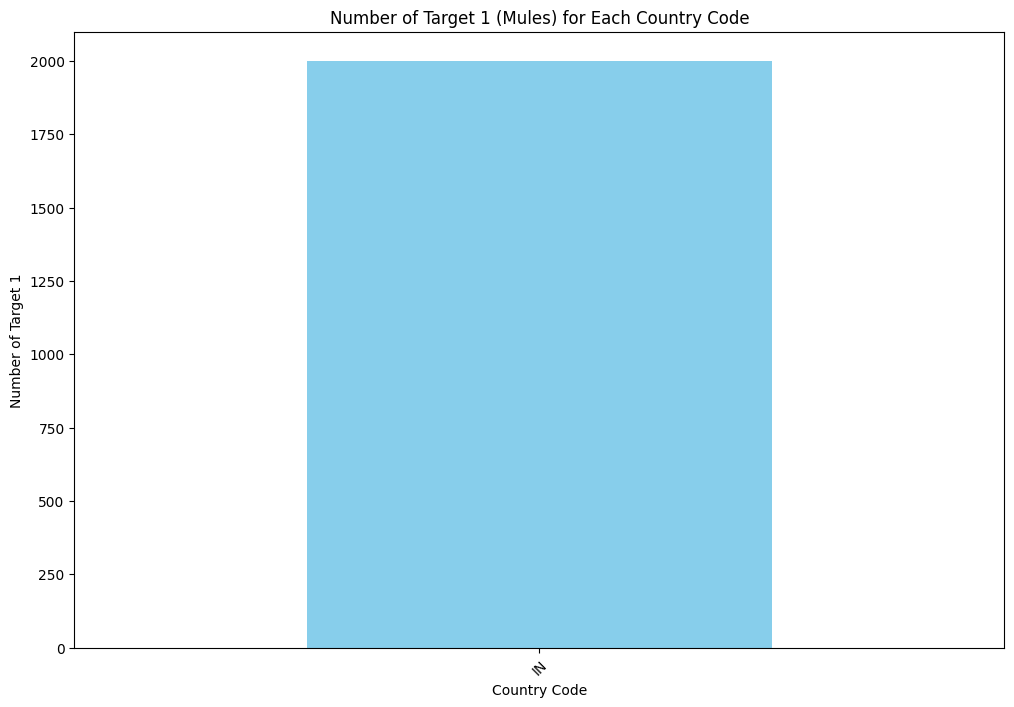

In [248]:
# Group by 'country_code' and count the occurrences of target 1 for each country code
country_counts = df_new[df_new['Target'] == 1].groupby('country_code').size()

# Plot the graph
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Target 1 (Mules) for Each Country Code')
plt.xlabel('Country Code')
plt.ylabel('Number of Target 1')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

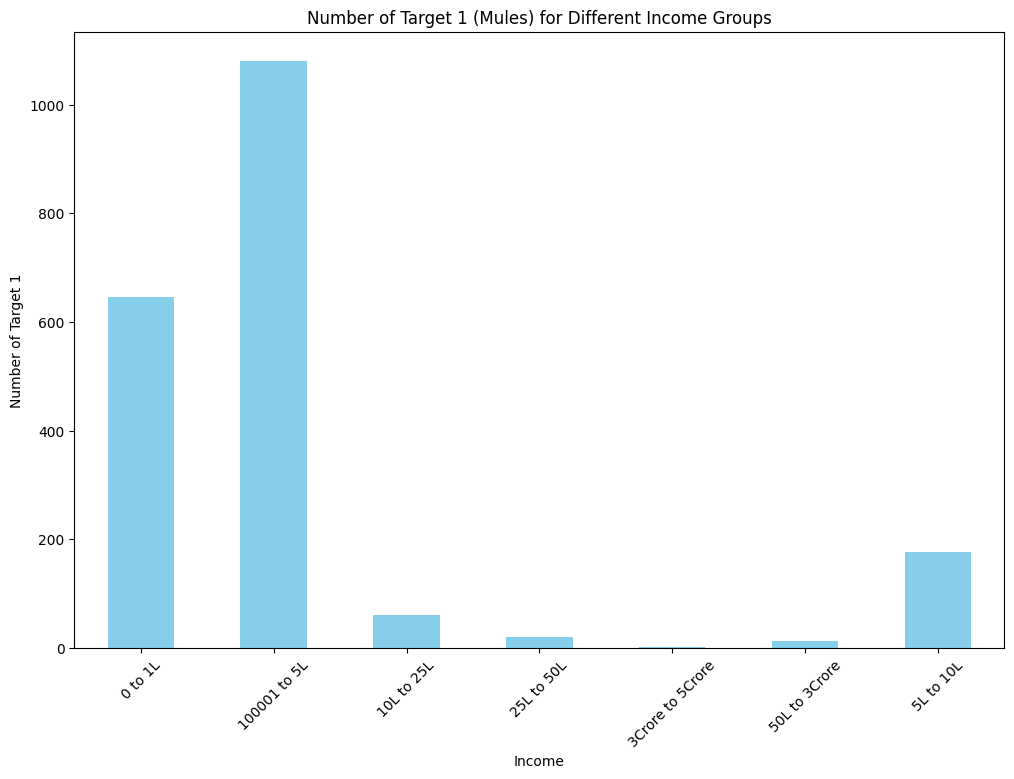

In [249]:
# Group by 'income' and count the occurrences of target 1 for each class of income
country_counts = df_new[df_new['Target'] == 1].groupby('income').size()

# Plot the graph
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Target 1 (Mules) for Different Income Groups')
plt.xlabel('Income')
plt.ylabel('Number of Target 1')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

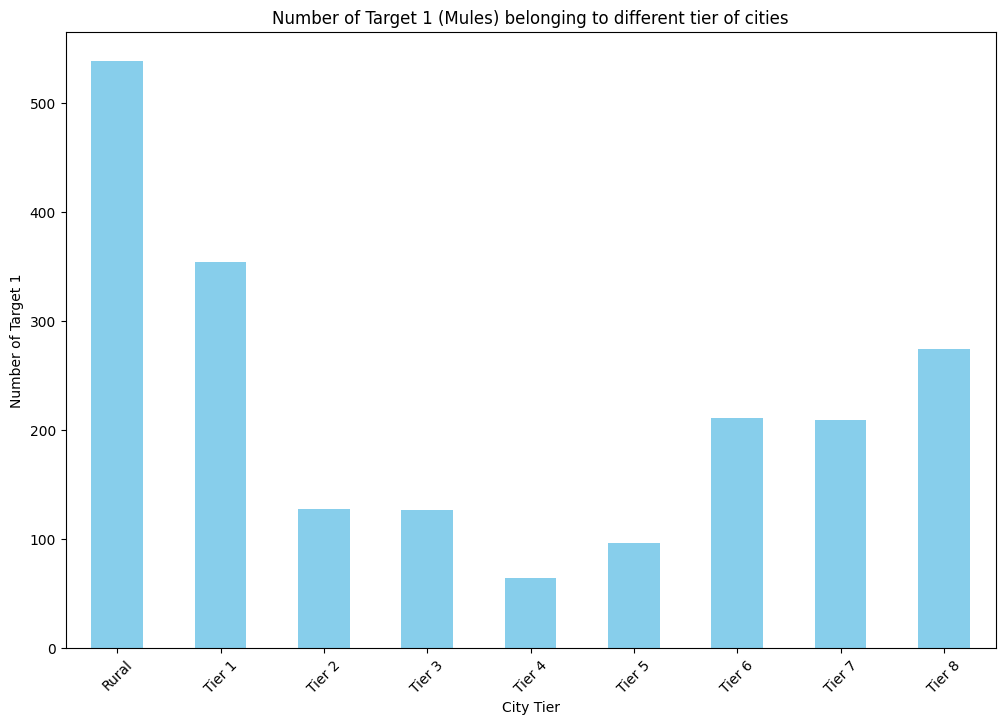

In [250]:
# Group by 'city tier' and count the occurrences of target 1 for each city tier
country_counts = df_new[df_new['Target'] == 1].groupby('city_tier').size()

# Plot the graph
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Target 1 (Mules) belonging to different tier of cities')
plt.xlabel('City Tier')
plt.ylabel('Number of Target 1')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

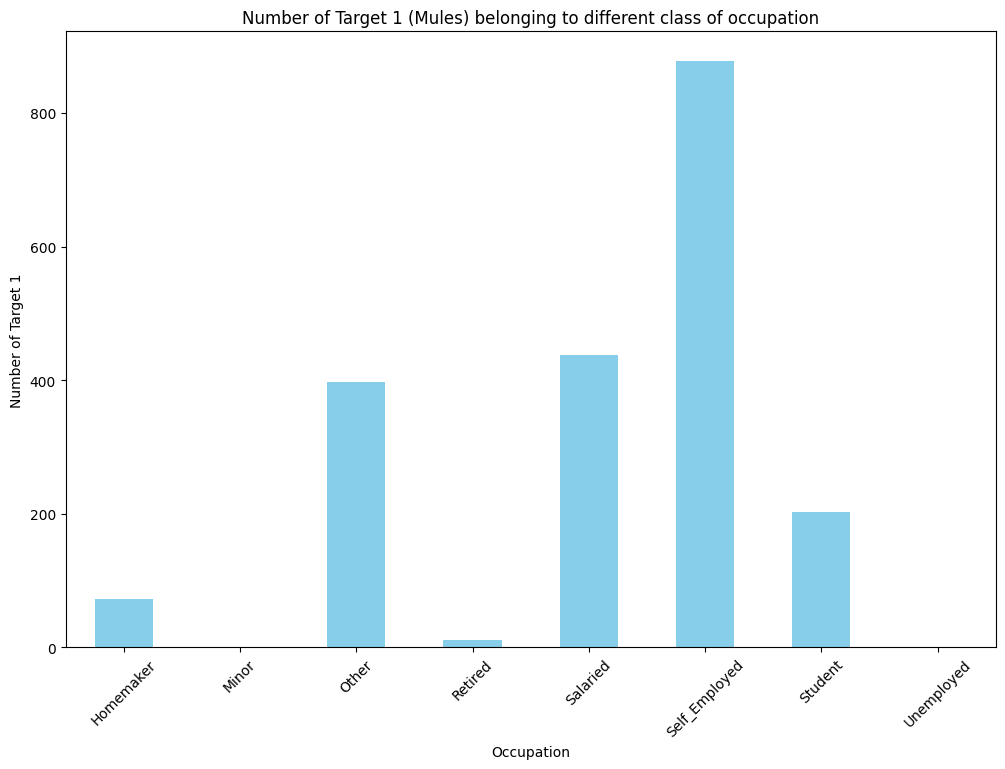

In [251]:
# Group by 'occupation' and count the occurrences of target 1 for each class of occupation
country_counts = df_new[df_new['Target'] == 1].groupby('occupation').size()

# Plot the graph
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Target 1 (Mules) belonging to different class of occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Target 1')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

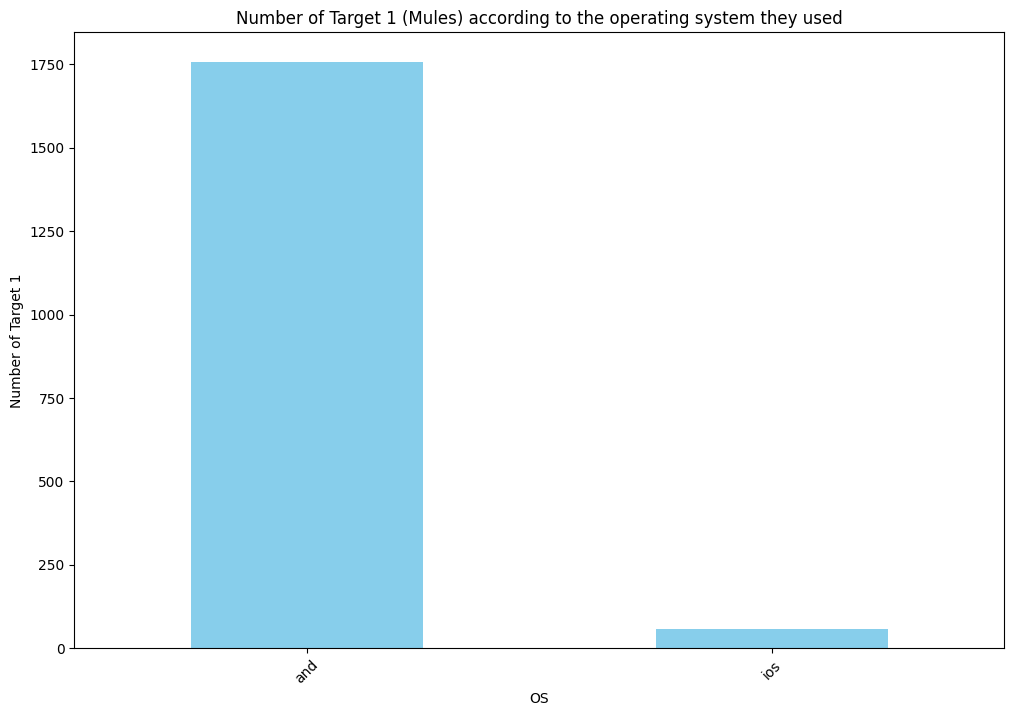

In [252]:
# Group by 'os' and count the occurrences of target 1 for each os user
country_counts = df_new[df_new['Target'] == 1].groupby('os').size()

# Plot the graph
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Target 1 (Mules) according to the operating system they used')
plt.xlabel('OS')
plt.ylabel('Number of Target 1')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

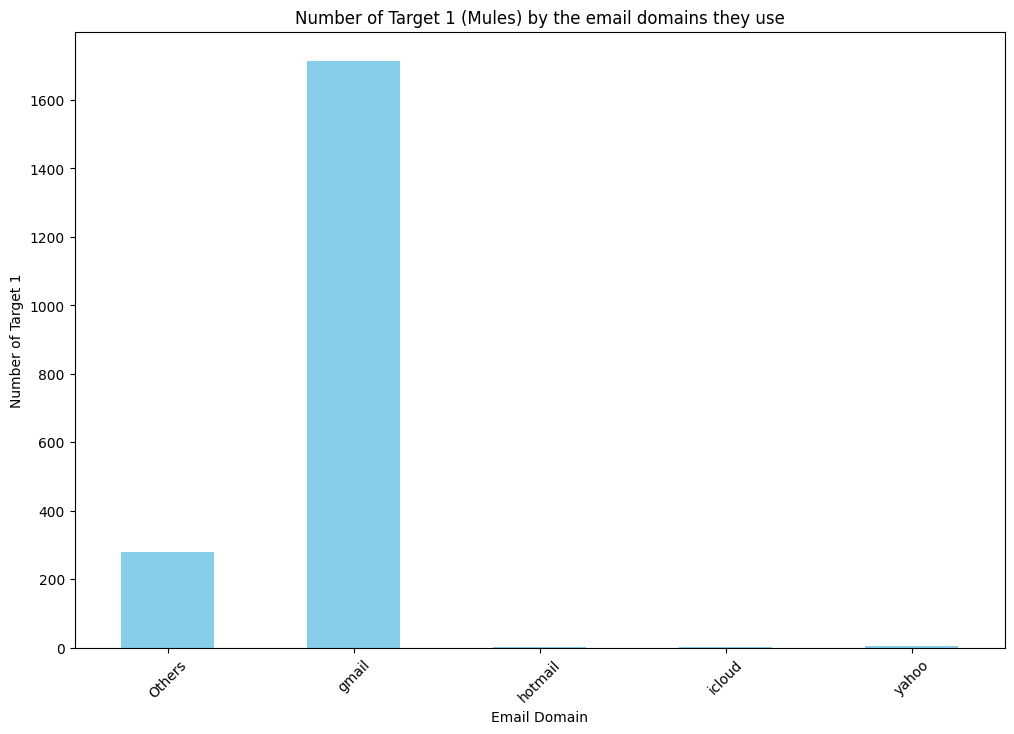

In [253]:
# Group by 'email domain' and count the occurrences of target 1 for each email domain
country_counts = df_new[df_new['Target'] == 1].groupby('email_domain').size()

# Plot the graph
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Target 1 (Mules) by the email domains they use')
plt.xlabel('Email Domain')
plt.ylabel('Number of Target 1')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# **Data Preprocessing**



*Data Cleaning*

Handling Missing Values

In [121]:
# Handling columns with missing values

# Count the number of missing values in each column
missing_values = df_new.isnull().sum()

# Display the result
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
Primary key                0
Target                     0
account_opening_date       0
country_code            3666
demog_1                 3669
                        ... 
demog_42                   0
demog_43                3705
year                       0
month                      0
day                        0
Length: 181, dtype: int64


In [122]:
# Get the names of columns with more than 95,000 empty values
columns_to_drop = missing_values[missing_values > 95000].index

columns_to_drop

Index(['others_42', 'others_43', 'others_44', 'others_45'], dtype='object')

In [123]:
# Drop the columns from the DataFrame
df_new = df_new.drop(columns=columns_to_drop)

In [124]:
# Drop the columns from the Validation DataFrame
vl_df = vl_df.drop(columns=columns_to_drop)

In [125]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 177 entries, Primary key to day
dtypes: datetime64[ns](1), float64(143), int64(21), object(12)
memory usage: 135.0+ MB


In [126]:
vl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 176 entries, Primary key to day
dtypes: datetime64[ns](1), float64(156), int64(7), object(12)
memory usage: 67.1+ MB


In [127]:
df_new['Target'].value_counts()

0    98000
1     2000
Name: Target, dtype: int64

In [128]:
# Creating lists with columns containing object and non-object data type
categorical_columns = df_new.select_dtypes(include=['object']).columns
non_categorical_columns = df_new.select_dtypes(exclude=['object']).columns.tolist()

In [129]:
target_column = 'Target'

# Remove the target column from non_categorical_columns
if target_column in non_categorical_columns:
    non_categorical_columns.remove(target_column)


In [130]:
# Filling missing values with mean of each column
for col in non_categorical_columns:
  df_new[col] = df_new[col].fillna(df_new[col].mean())

In [131]:
# Filling missing values with mean of each column
for col in non_categorical_columns:
  vl_df[col] = vl_df[col].fillna(vl_df[col].mean())

In [132]:
# Converting the object data type to string data type and filling missing values with mode of each column
for col in categorical_columns:
  df_new[col] = df_new[col].astype(str)
  df_new[col] = df_new[col].fillna(df_new.mode().iloc[0])

In [133]:
# Converting the object data type to string data type and filling missing values with mode of each column
for col in categorical_columns:
  vl_df[col] = vl_df[col].astype(str)
  vl_df[col] = vl_df[col].fillna(vl_df.mode().iloc[0])

In [134]:
# Checking for missing values in the entire DataFrame
missing_values = df_new.isnull().sum()

# Checking if there are any missing values
if missing_values.sum() > 0:
    print("1")
else:
    print("0")


0


In [135]:
# Checking for missing values in the entire DataFrame
missing_values = vl_df.isnull().sum()

# Checking if there are any missing values
if missing_values.sum() > 0:
    print("1")
else:
    print("0")

0


Dropping Unnecessary Columns

In [136]:
unique_values_count = df_new.nunique()

In [137]:
sorted_unique_values_count = unique_values_count.sort_values()
sorted_unique_values_count

txn_36              1
txn_35              1
demog_38            1
demog_12            1
txn_72              1
                ...  
others_6          952
demog_23         1458
others_9         2170
demog_24        14976
Primary key    100000
Length: 177, dtype: int64

In [138]:
# Removing columns with a single value
non_unique_columns = sorted_unique_values_count[sorted_unique_values_count==1].index
df_new.drop(columns=non_unique_columns,inplace=True)

print(len(non_unique_columns))

11


In [139]:
vl_df.drop(columns=non_unique_columns,inplace=True)


In [140]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 166 entries, Primary key to day
dtypes: datetime64[ns](1), float64(132), int64(21), object(12)
memory usage: 126.6+ MB


In [141]:
df_new['Target'].value_counts()

0    98000
1     2000
Name: Target, dtype: int64

In [142]:
# Compute the correlation between the transformed date features and the target column
correlation_with_target = df_new[['year', 'month', 'day']].corrwith(df_new['Target'])

# Print the correlation values
print(correlation_with_target)


year    -0.000759
month   -0.000893
day     -0.005975
dtype: float64


In [143]:
#Since they have very less correlation with the target variable
df_new.drop('month',axis=1,inplace=True)
df_new.drop('year',axis=1,inplace=True)

In [144]:
vl_df.drop('month',axis=1,inplace=True)
vl_df.drop('year',axis=1,inplace=True)

In [145]:
df_new.drop('account_opening_date',axis=1,inplace=True)
vl_df.drop('account_opening_date',axis=1,inplace=True)


In [146]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 163 entries, Primary key to day
dtypes: float64(132), int64(19), object(12)
memory usage: 124.4+ MB


Checking for duplicate entries

In [147]:
#checking for duplicated rows
duplicate_rows = df_new[df_new.duplicated()]
duplicate_rows

,Primary key,Target,country_code,demog_1,demog_2,income,demog_3,city_tier,occupation,demog_4,...,others_41,txn_80,txn_81,demog_39,email_domain,demog_40,demog_41,demog_42,demog_43,day


Performing Label encoding for categorical Features

In [148]:
# Creating lists with columns containing object and non-object data type
categorical_columns = df_new.select_dtypes(include=['object']).columns
non_categorical_columns = df_new.select_dtypes(exclude=['object']).columns

for col in categorical_columns:

  df_new[col] = df_new[col].astype(str)
  label_encoder = LabelEncoder()
  df_new[col] = label_encoder.fit_transform(df_new[col])


In [149]:
for col in categorical_columns:

  vl_df[col] = vl_df[col].astype(str)
  label_encoder = LabelEncoder()
  vl_df[col] = label_encoder.fit_transform(vl_df[col])

#**Feature Selection**

In [150]:
target = 'Target'
X = df_new.drop(target, axis=1)  # Features
y = df_new[target]  # Target variable

# Compute mutual information for each feature
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame to display the results
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)

# Display the results
print(mi_df)

         Feature  Mutual_Information
0    Primary key            0.098027
129     demog_23            0.071274
102     others_6            0.070523
108    others_12            0.070314
109    others_13            0.069514
..           ...                 ...
115    others_19            0.000000
149    others_38            0.000000
127    others_31            0.000000
128    others_32            0.000000
137     demog_31            0.000000

[162 rows x 2 columns]


In [151]:
# Get the rows where column 'A' is less than the threshold
filtered_rows = mi_df[mi_df['Mutual_Information'] < 0.001]

columns_to_drop = filtered_rows['Feature'].tolist()

# Print the filtered rows
print(filtered_rows)
print("Number of columns to be dropped->" + str(len(filtered_rows)))

       Feature  Mutual_Information
136   demog_30            0.000764
143   demog_37            0.000752
141   demog_35            0.000740
135   demog_29            0.000722
161        day            0.000703
151  others_40            0.000593
133   demog_27            0.000575
100   others_4            0.000515
150  others_39            0.000387
116  others_20            0.000284
142   demog_36            0.000266
125  others_29            0.000244
16    demog_14            0.000234
148  others_37            0.000163
14    demog_11            0.000033
144  others_33            0.000000
13    demog_10            0.000000
20    demog_18            0.000000
99    others_3            0.000000
126  others_30            0.000000
145  others_34            0.000000
152  others_41            0.000000
131   demog_25            0.000000
115  others_19            0.000000
149  others_38            0.000000
127  others_31            0.000000
128  others_32            0.000000
137   demog_31      

In [152]:
df_new.drop(columns_to_drop,axis=1,inplace=True)

In [153]:
vl_df.drop(columns_to_drop,axis=1,inplace=True)

In [154]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 135 entries, Primary key to demog_43
dtypes: float64(111), int64(24)
memory usage: 103.0 MB


In [155]:
y = df_new['Target']
X = df_new.drop('Primary key',axis=1)


In [156]:
vl_df.drop('Primary key',axis=1,inplace=True)

In [157]:
X.drop('Target',axis=1,inplace=True)

In [158]:
X.head()

,country_code,demog_1,demog_2,income,demog_3,city_tier,occupation,demog_4,demog_5,demog_6,...,others_35,others_36,txn_80,txn_81,demog_39,email_domain,demog_40,demog_41,demog_42,demog_43
0,20,53.0,7,2,101.0,0,5,6,3.0,1.0,...,0,0,1.000000,1.000000,1,2,1,1,1,2
1,20,55.0,0,1,101.0,1,4,6,2.0,1.0,...,0,1,12.000000,28.000000,1,2,0,1,1,0
2,20,55.0,7,1,101.0,2,5,6,4.0,1.0,...,1,1,5.000000,48.000000,1,2,2,1,1,0
3,20,53.0,7,2,101.0,7,5,6,4.0,1.0,...,0,0,1.000000,10.000000,1,2,0,1,1,0
4,20,55.0,10,1,101.0,1,6,6,4.0,1.0,...,0,0,34.742439,22.679159,1,2,1,1,1,2


In [159]:
vl_df.head()

,country_code,demog_1,demog_2,income,demog_3,city_tier,occupation,demog_4,demog_5,demog_6,...,others_35,others_36,txn_80,txn_81,demog_39,email_domain,demog_40,demog_41,demog_42,demog_43
0,9,56.0,5,8,101.0,7,5,5,4.0,1.0,...,0.0,1.0,6.000000,9.000000,1,2,0,1,1,0
1,9,55.0,0,2,101.0,5,4,5,2.0,1.0,...,0.0,0.0,36.089283,22.447168,1,2,1,1,1,2
2,9,55.0,0,2,101.0,1,2,5,3.0,1.0,...,1.0,0.0,14.000000,25.000000,1,2,1,1,1,2
3,9,55.0,0,2,101.0,1,2,5,4.0,1.0,...,1.0,1.0,2.000000,21.000000,1,2,2,1,1,0
4,9,55.0,0,2,101.0,5,2,5,4.0,1.0,...,0.0,0.0,36.089283,22.447168,1,2,1,1,1,0


#**Scaling And Principal Component Analysis**

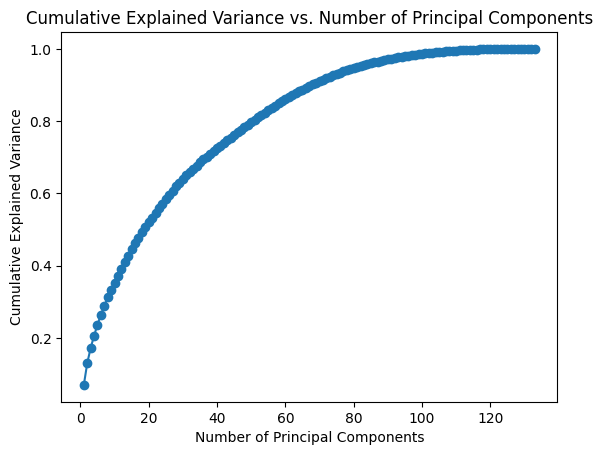

In [160]:
#Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Appliying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
# Plot the cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

In [161]:
#Scaling the features
#scaler = StandardScaler()
vl_scaled = scaler.transform(vl_df)

#Appliying PCA to the Validation dataset
vl_df = pca.transform(vl_scaled)

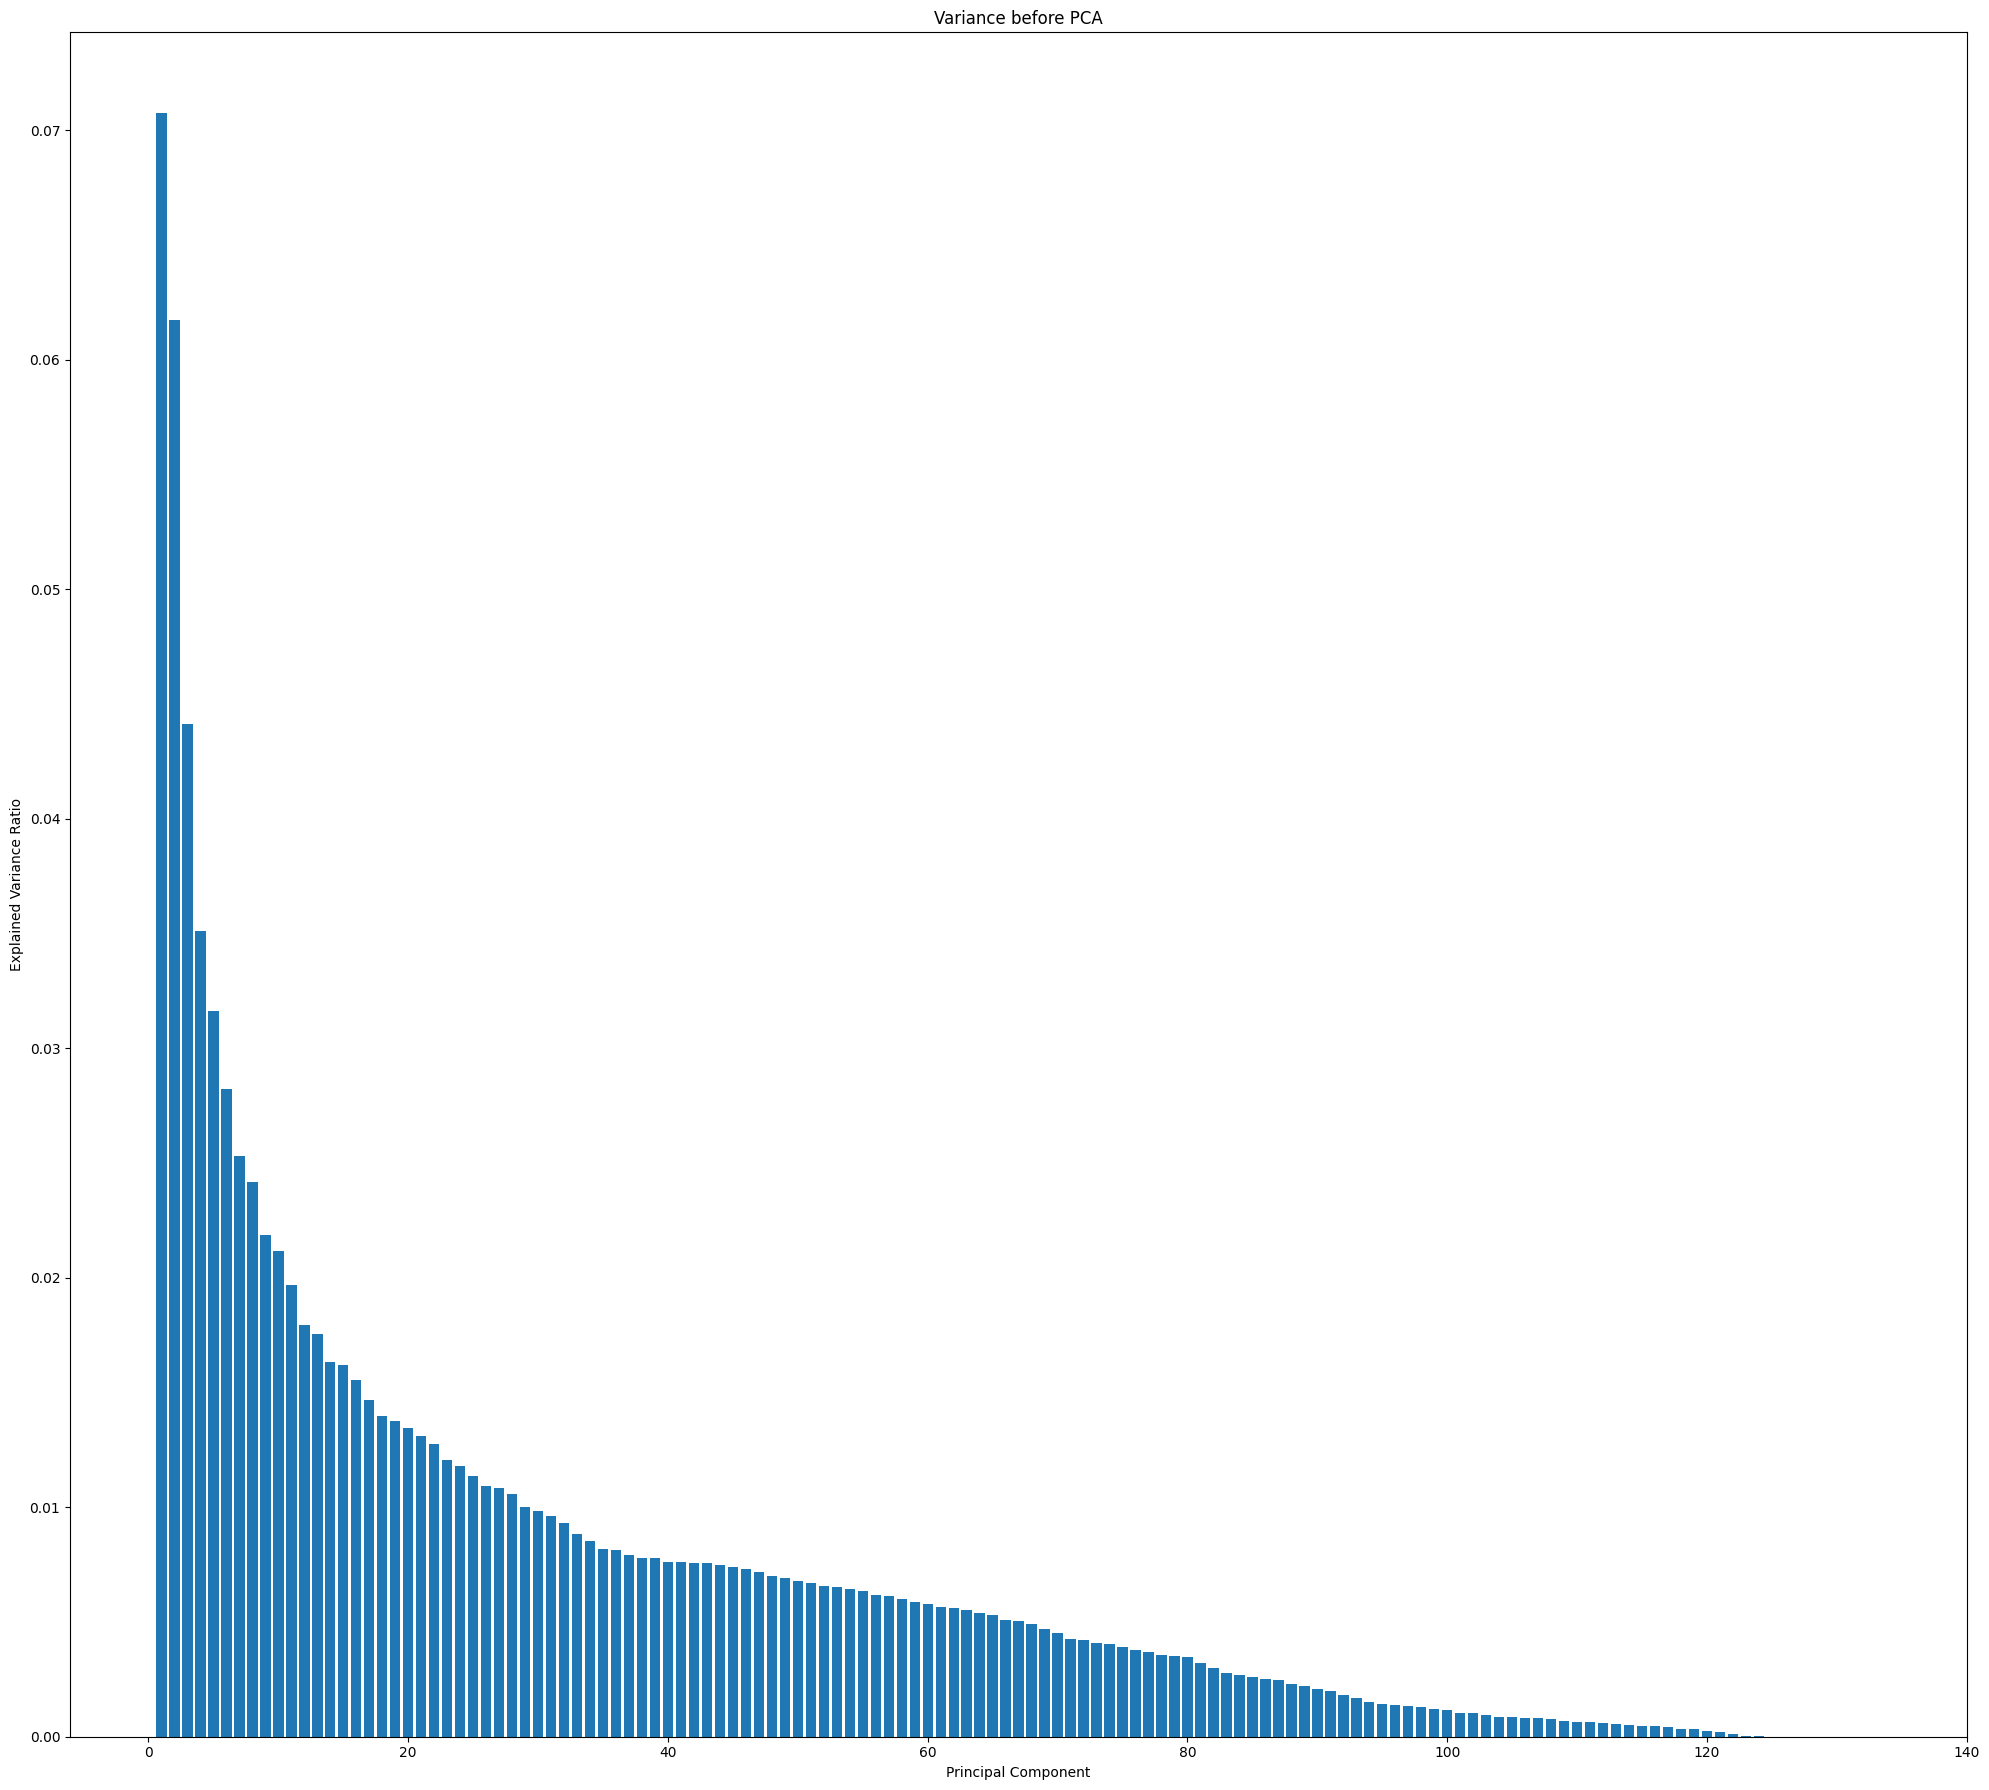

In [162]:
fig, ax = plt.subplots(figsize=(20, 18))
# Plot the explained variance ratio for each principal component
ax.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
ax.set_title('Variance before PCA')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')

# Ensure tight layout
plt.tight_layout()

# Display the plot
plt.show()

In [163]:
target_explained_variance = 0.90
n_components = next(i for i, variance in enumerate(cumulative_explained_variance, 1) if variance >= target_explained_variance)

# Retain only the selected number of principal components
X_pca_selected = X_pca[:, :n_components]

print(f"Number of Principal Components Selected: {n_components}")

Number of Principal Components Selected: 68


In [164]:
vl_df = vl_df[:, :n_components]


In [165]:
vl_df.shape

(50000, 68)

In [167]:
# Create column names from 1 to 69
column_names = ["Pca"+str(i) for i in range(1, 69)]

X_eda = pd.DataFrame(X_pca_selected, columns = column_names)
y_eda = pd.DataFrame(y, columns = ['Target'])
df_eda = pd.concat([X_eda,y_eda],axis=1)

In [168]:
df_eda.describe()

,Pca1,Pca2,Pca3,Pca4,Pca5,Pca6,Pca7,Pca8,Pca9,Pca10,...,Pca60,Pca61,Pca62,Pca63,Pca64,Pca65,Pca66,Pca67,Pca68,Target
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,...,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
mean,5.456968e-17,-1.364242e-16,3.637979e-17,-9.094947e-18,-4.547474e-18,-2.330580e-17,-6.707523e-17,6.821210e-18,-3.723244e-17,1.364242e-17,...,-1.307399e-17,-5.790923e-18,7.673862e-18,2.273737e-17,3.240075e-17,6.480150e-17,-2.842171e-17,2.430056e-17,6.252776e-18,0.020000
std,3.041690e+00,2.827384e+00,2.370067e+00,2.114440e+00,2.034169e+00,1.916134e+00,1.820902e+00,1.737058e+00,1.670518e+00,1.627337e+00,...,8.794993e-01,8.671930e-01,8.591563e-01,8.451052e-01,8.282902e-01,8.210816e-01,8.094931e-01,8.015100e-01,7.934965e-01,0.140001
min,-1.138281e+01,-9.360148e+00,-5.468294e+01,-5.224211e+01,-1.180015e+02,-1.277303e+02,-3.197387e+01,-1.607150e+02,-1.748868e+02,-1.008458e+02,...,-1.397961e+01,-1.179486e+01,-8.196580e+00,-1.755191e+01,-2.886379e+01,-1.764028e+01,-3.697035e+01,-2.914678e+01,-4.672226e+01,0.000000
25%,-9.464056e-01,-1.041030e+00,-1.090248e+00,-1.012282e+00,-3.055062e-01,-4.974653e-01,-1.630820e+00,-4.629774e-01,-3.198607e-01,-2.280869e-01,...,-2.925585e-01,-3.491959e-01,-4.783549e-01,-3.761782e-01,-4.159070e-01,-4.434809e-01,-4.487695e-01,-3.989995e-01,-3.217015e-01,0.000000
50%,-3.609655e-01,-5.303735e-01,-2.296358e-01,2.102827e-01,5.966301e-02,6.133197e-02,7.905057e-01,3.532748e-02,1.321233e-01,-4.251298e-02,...,1.668299e-02,1.678523e-03,1.179119e-02,-1.671528e-02,-2.095783e-02,6.766327e-02,-2.205905e-02,3.904276e-02,-1.147681e-02,0.000000
75%,2.222930e-01,-4.023867e-02,7.457554e-01,1.267165e+00,4.397526e-01,4.807150e-01,1.372880e+00,5.871026e-01,4.200903e-01,1.508817e-01,...,3.340620e-01,3.419546e-01,5.113571e-01,3.699556e-01,3.493537e-01,4.407828e-01,4.381811e-01,3.930294e-01,2.928561e-01,0.000000
max,2.146468e+02,1.579465e+01,6.737980e+01,1.109663e+02,2.381655e+02,1.867112e+02,7.898001e+01,1.811429e+02,2.368240e+02,1.371724e+02,...,3.842953e+01,1.450274e+01,1.226676e+01,2.081881e+01,3.074482e+01,3.053870e+01,3.709836e+01,3.088348e+01,5.058782e+01,1.000000


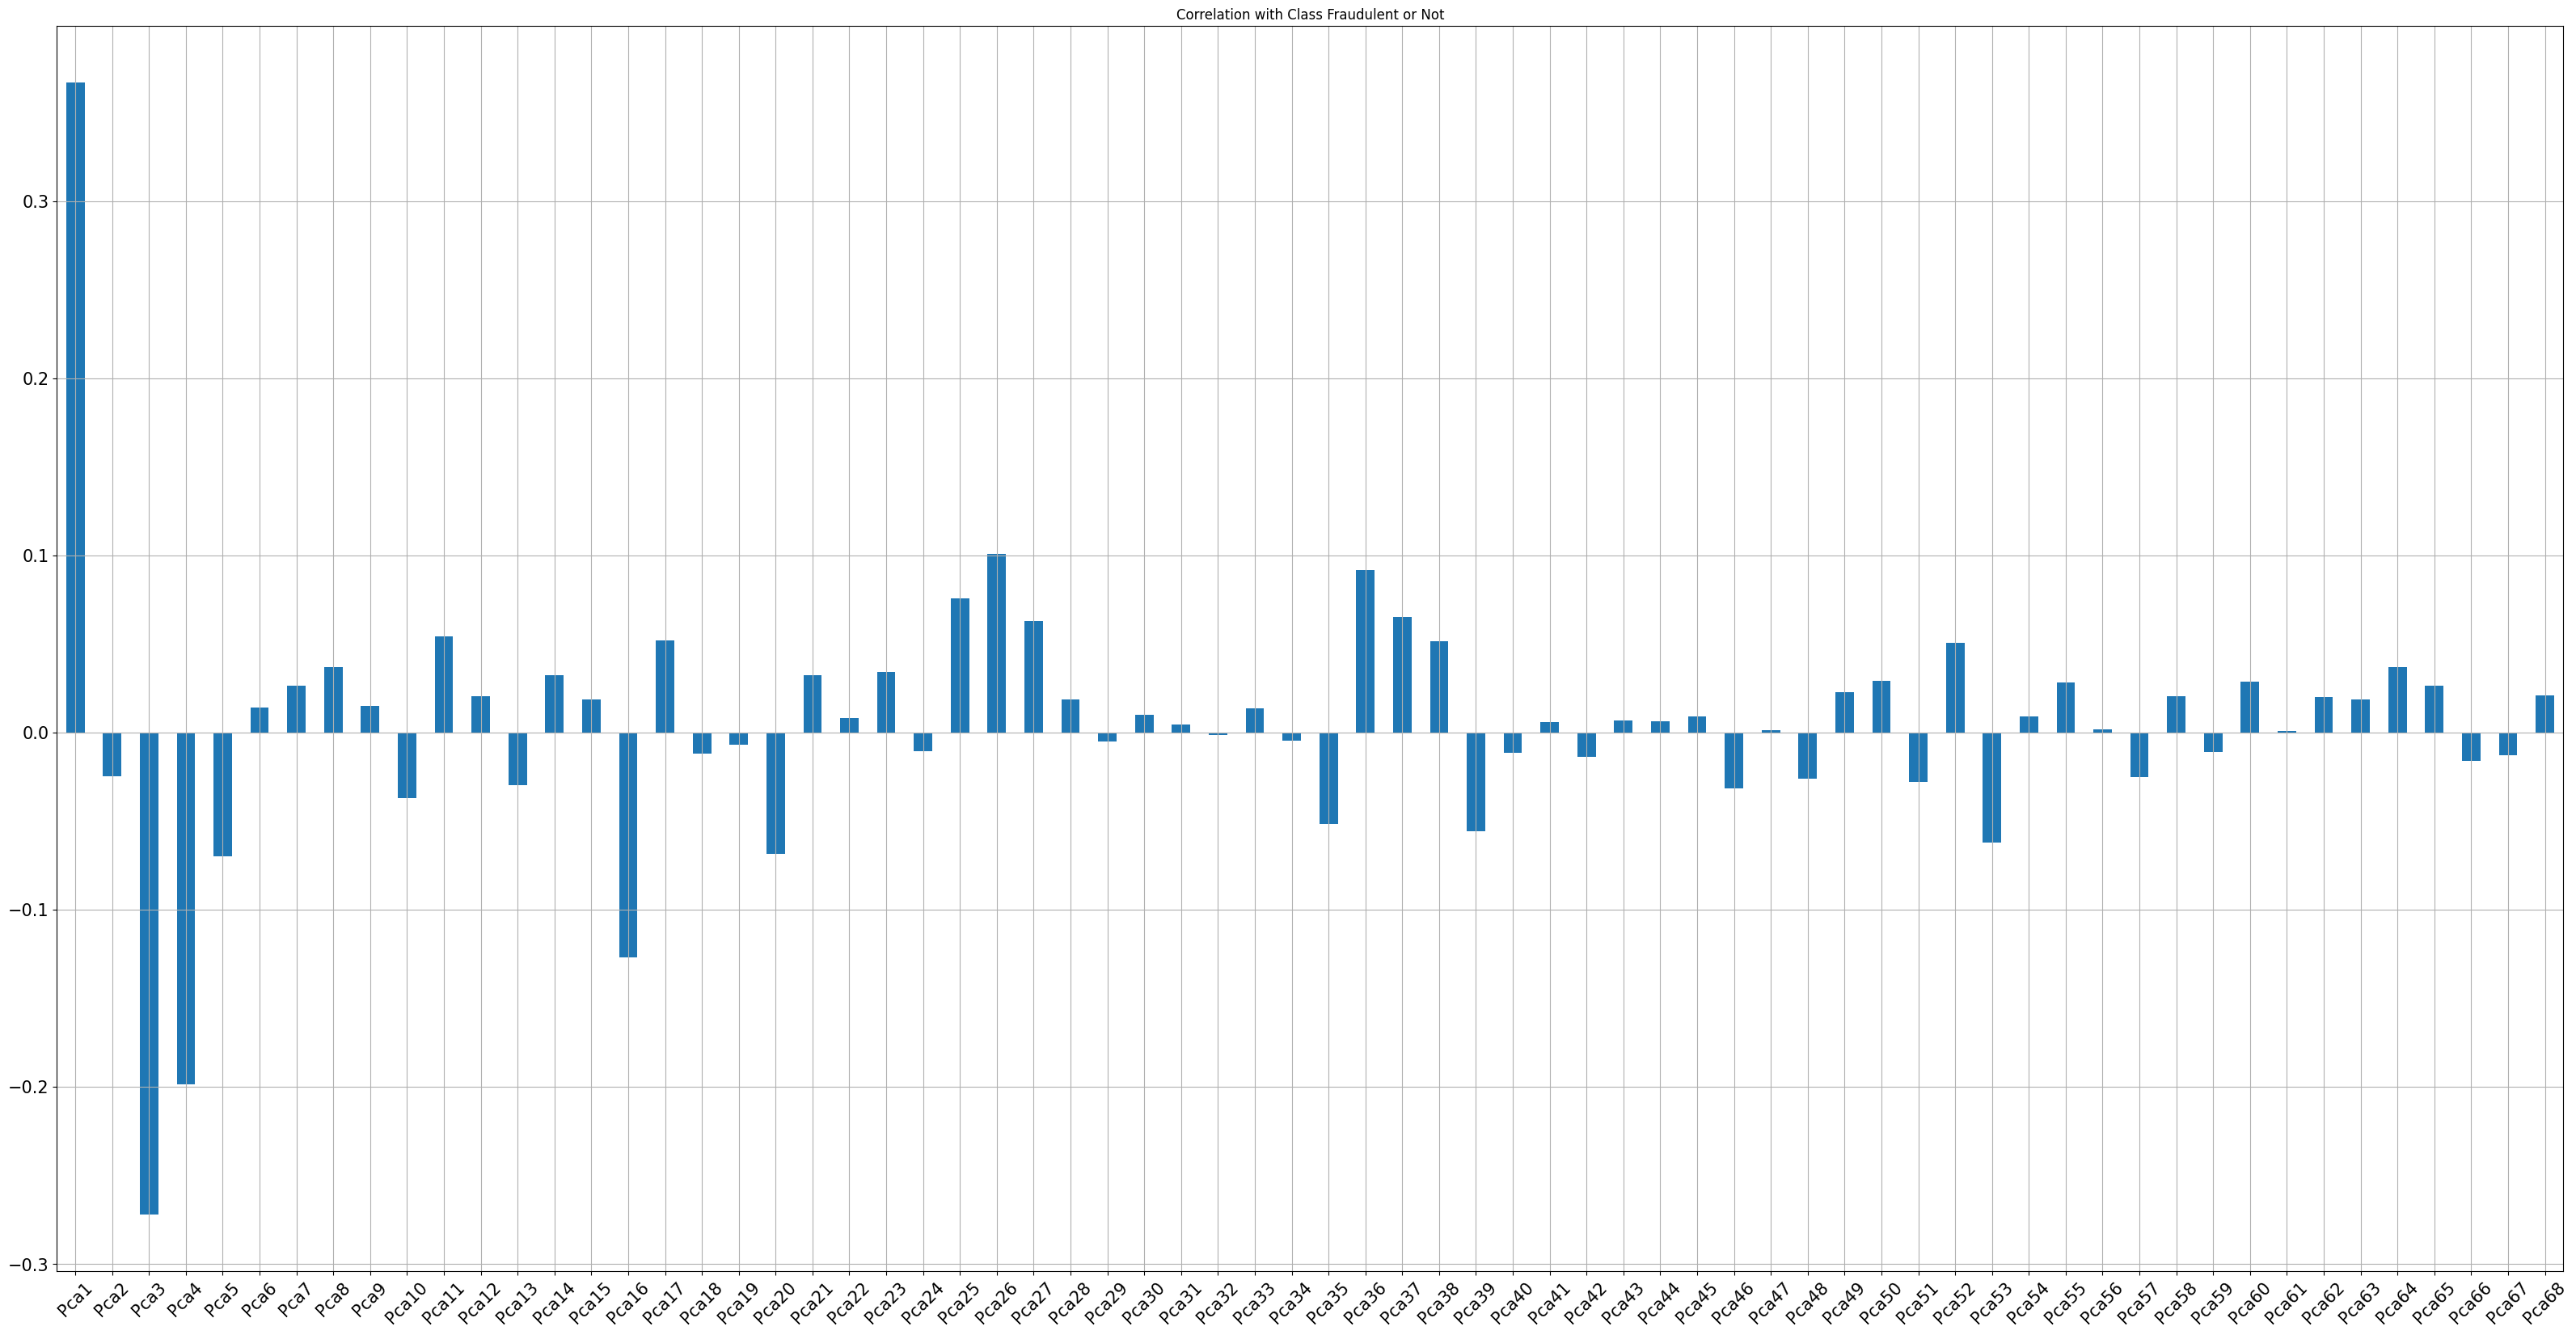

In [169]:
## Linear Correlation with Response Variable (Note: Models like RandomForest are not linear)
data2 = df_eda.drop(columns = ['Target'])   # drop non numerical columns
data2.corrwith(df_eda.Target).plot.bar(
        figsize = (40, 20), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

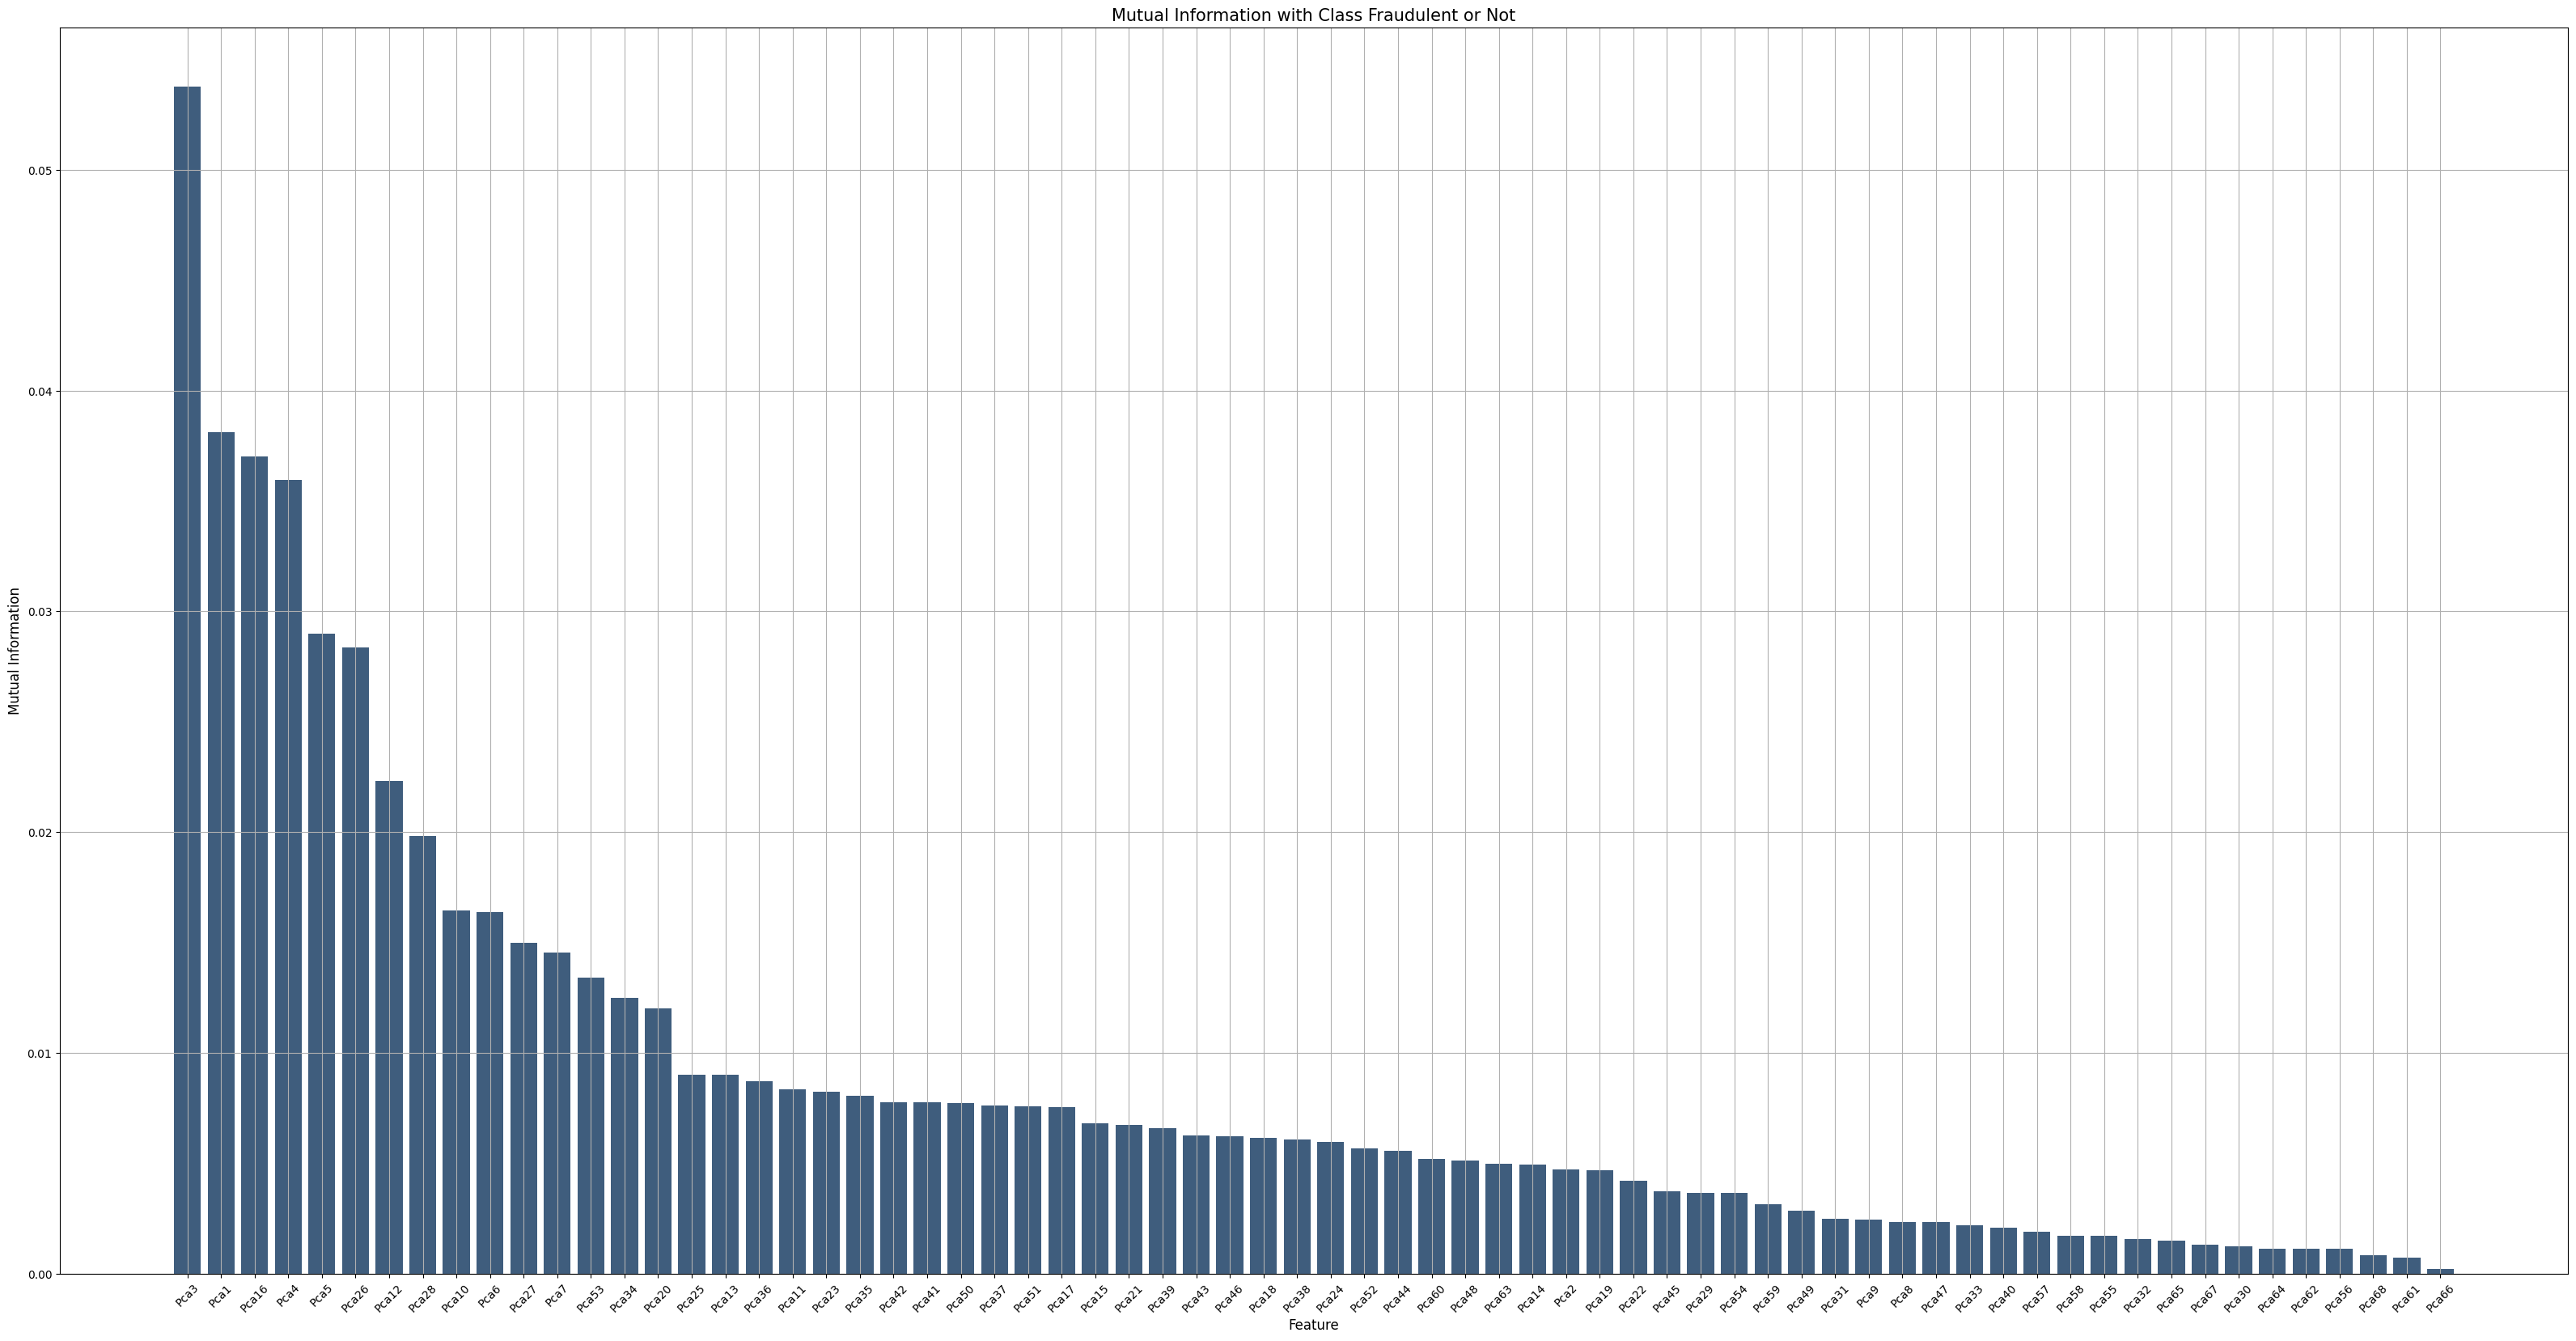

In [170]:
# Drop non-numerical columns
data2 = df_eda.drop(columns=['Target'])

# Calculate Mutual Information with the target variable
mi_values = mutual_info_classif(data2, df_eda['Target'])

# Create a DataFrame with feature names and their corresponding MI values
mi_df = pd.DataFrame({'Feature': data2.columns, 'MI': mi_values})

# Sort the DataFrame by MI values
mi_df = mi_df.sort_values(by='MI', ascending=False)

# Plot the Mutual Information values
plt.figure(figsize=(40, 20))
plt.bar(mi_df['Feature'], mi_df['MI'], color='#3F5D7D')
plt.title("Mutual Information with Class Fraudulent or Not", fontsize=15)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Mutual Information", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True)
plt.show()


#**Splitting the Data into Training, Testing And Validation Sets**

Training set size = 60% of Total data

Testing set size = 20% of Total data

Validation set size = 20% of Total data

In [171]:
from sklearn.model_selection import train_test_split

# X is your feature matrix and y is your target vector

# Split the data into training and testing data (80% for training and 20% for testing data)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_pca_selected, y, test_size=0.2, random_state=42)

# Split the temporary training data into training and validation data (60% for training and 20% for validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Print the sizes of the resulting datasets
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 60000
Validation set size: 20000
Testing set size: 20000


#**Model Training**

1.XGB Classifier

In [172]:
# Create an instance of XGBClassifier #x=0.90 components = 69
xgb_clf = XGBClassifier(
    objective='multi:softmax',  # Multiclass classification
    num_class=2,  # Number of classes
    max_depth=3,  # Maximum depth of the tree
    learning_rate=0.3,  # Learning rate
    n_estimators=200  # Number of boosting rounds
)

# The sample weights are used to adjust the contribution of each sample to the model's objective function
# In this example, assuming class 0 is the majority class and class 1 is the minority class
sample_weights = [1.0 if label == 0 else 2.5 for label in y_train]

# Train the model
xgb_clf.fit(X_train, y_train,  sample_weight=sample_weights)

# Make predictions on the test set
xgb_pred = xgb_clf.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, xgb_pred))

# Calculate the average precision
average_precision = average_precision_score(y_test, xgb_pred)

# Print the average precision
print('Average Precision:', average_precision)

# Calculate balanced accuracy score
balanced_acc = balanced_accuracy_score(y_test, xgb_pred)

# Calculate Cohen's kappa coefficient
kappa = cohen_kappa_score(y_test, xgb_pred)

# Print the scores
print("Balanced Accuracy Score:", balanced_acc)
print("Cohen's Kappa Coefficient:", kappa)
print('roc_auc_score: ', roc_auc_score(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19614
           1       0.89      0.87      0.88       386

    accuracy                           1.00     20000
   macro avg       0.94      0.93      0.94     20000
weighted avg       1.00      1.00      1.00     20000

Average Precision: 0.7732804835924008
Balanced Accuracy Score: 0.9315973152305823
Cohen's Kappa Coefficient: 0.875422792270855
roc_auc_score:  0.9315973152305824


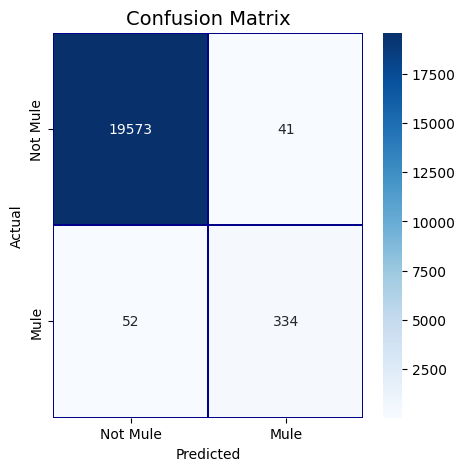

In [173]:
# Compute confusion matrix
cm = pd.crosstab(y_test, xgb_pred, rownames=['Actual'], colnames=['Predicted'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Mule', 'Mule'],
            yticklabels=['Not Mule', 'Mule'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt ="d")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [174]:
# # Define the parameter grid for the grid search
# param_grid = {
#     'learning_rate': [0.1, 0.3],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [100, 200, 300]
# }

# # Create an XGBoost classifier
# model = xgb.XGBClassifier()

# # Create a GridSearchCV object
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# # Perform the grid search
# grid_search.fit(X_train, y_train)

# # Print the best parameters found
# print("Best parameters:", grid_search.best_params_)

# # Make predictions on the test data using the best model
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# # Evaluate the best model
# print(classification_report(y_test, y_pred))


2.Random Forest Classifier

In [175]:
#Create an instance of Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
rf_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, rf_pred))

# Calculate the average precision
average_precision = average_precision_score(y_test, rf_pred)

# Print the average precision
print('Average Precision:', average_precision)
print("Balanced Accuracy Score:", balanced_acc)
print("Cohen's Kappa Coefficient:", kappa)
print('roc_auc_score: ', roc_auc_score(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19614
           1       0.95      0.75      0.84       386

    accuracy                           0.99     20000
   macro avg       0.97      0.88      0.92     20000
weighted avg       0.99      0.99      0.99     20000

Average Precision: 0.7193455342525865
Balanced Accuracy Score: 0.9315973152305823
Cohen's Kappa Coefficient: 0.875422792270855
roc_auc_score:  0.8765351332531326


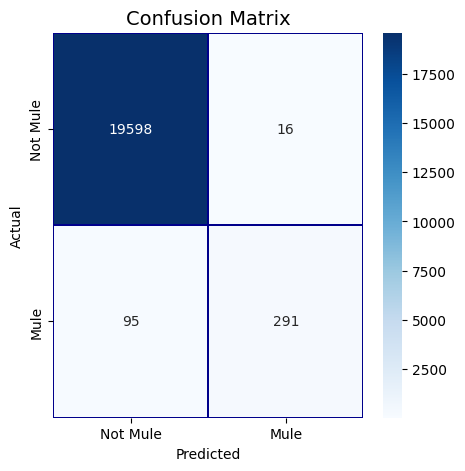

In [176]:
# Compute confusion matrix
cm = pd.crosstab(y_test, rf_pred, rownames=['Actual'], colnames=['Predicted'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Mule', 'Mule'],
            yticklabels=['Not Mule', 'Mule'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt ="d")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

3.K-Nearest-Neighbour

In [177]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='minkowski', p=2)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
knn_pred = knn_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, knn_pred))

# Calculate the average precision
average_precision = average_precision_score(y_test, knn_pred)

# Print the average precision
print('Average Precision:', average_precision)
print("Balanced Accuracy Score:", balanced_acc)
print("Cohen's Kappa Coefficient:", kappa)
print('roc_auc_score: ', roc_auc_score(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19614
           1       0.93      0.78      0.85       386

    accuracy                           0.99     20000
   macro avg       0.96      0.89      0.92     20000
weighted avg       0.99      0.99      0.99     20000

Average Precision: 0.7337424854572618
Balanced Accuracy Score: 0.9315973152305823
Cohen's Kappa Coefficient: 0.875422792270855
roc_auc_score:  0.891900730735316


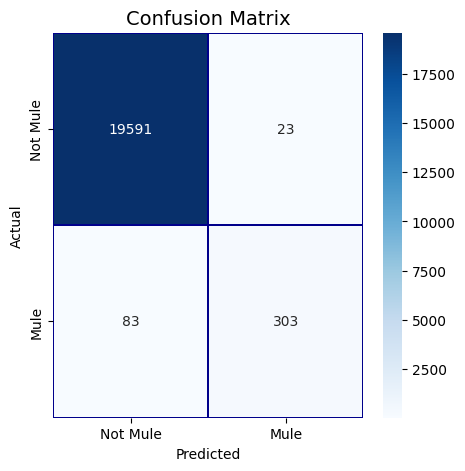

In [178]:
# Compute confusion matrix
cm = pd.crosstab(y_test, knn_pred, rownames=['Actual'], colnames=['Predicted'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Mule', 'Mule'],
            yticklabels=['Not Mule', 'Mule'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt ="d")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

4.Support Vector Machines

In [179]:
# Create an SVM classifier
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the classifier on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
svm_pred = svm.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, svm_pred))

# Calculate the average precision
average_precision = average_precision_score(y_test, svm_pred)

# Print the average precision
print('Average Precision:', average_precision)
print("Balanced Accuracy Score:", balanced_acc)
print("Cohen's Kappa Coefficient:", kappa)
print('roc_auc_score: ', roc_auc_score(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19614
           1       0.93      0.74      0.82       386

    accuracy                           0.99     20000
   macro avg       0.96      0.87      0.91     20000
weighted avg       0.99      0.99      0.99     20000

Average Precision: 0.6879541433844695
Balanced Accuracy Score: 0.9315973152305823
Cohen's Kappa Coefficient: 0.875422792270855
roc_auc_score:  0.8673148237670988


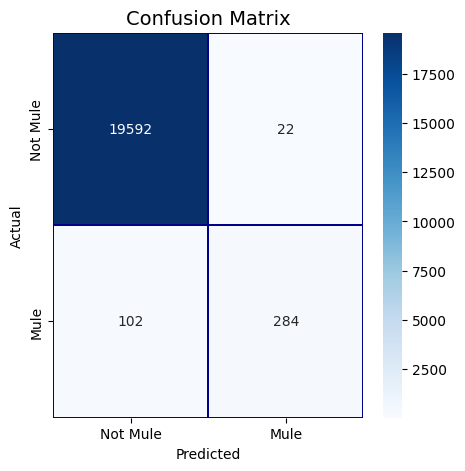

In [180]:
# Compute confusion matrix
cm = pd.crosstab(y_test, svm_pred, rownames=['Actual'], colnames=['Predicted'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Mule', 'Mule'],
            yticklabels=['Not Mule', 'Mule'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt ="d")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

#**Model Analysis**

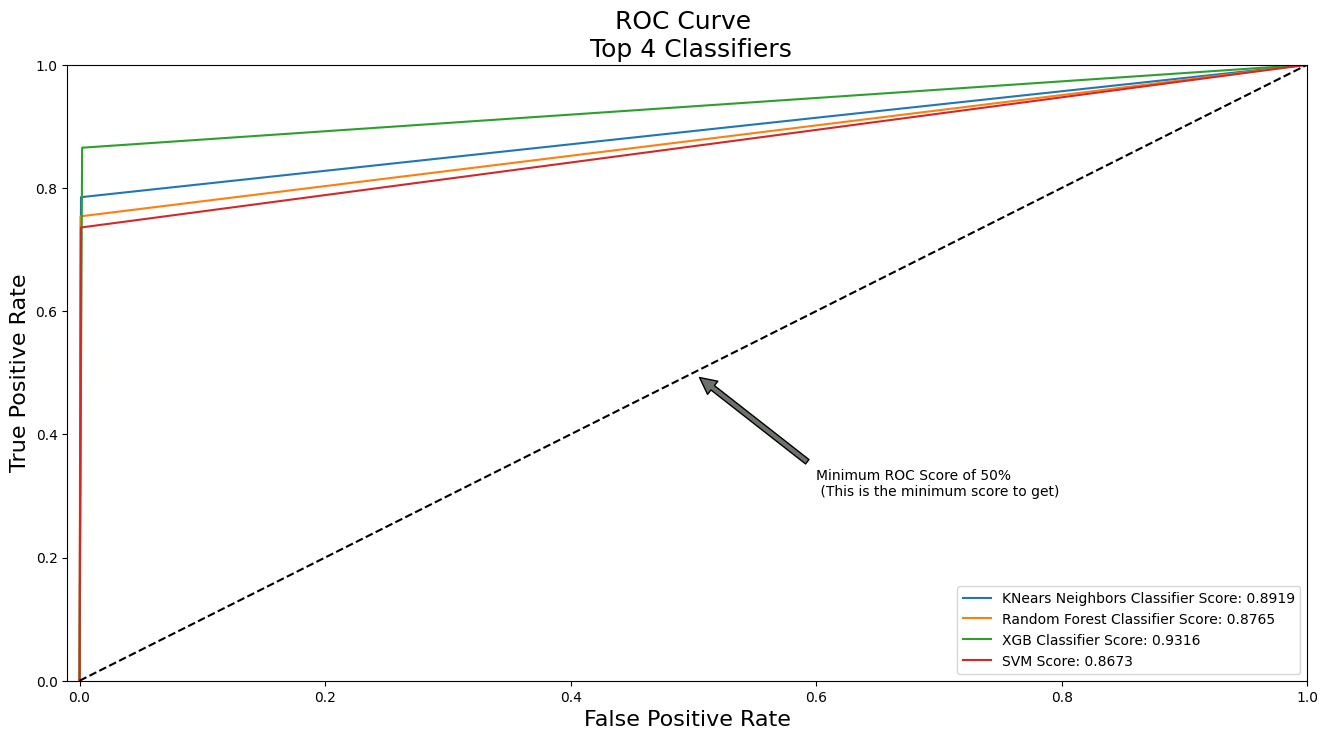

In [181]:
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test, knn_pred)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_pred)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_test, xgb_pred)
svm_fpr, svm_tpr, svm_threshold = roc_curve(y_test, svm_pred)


def graph_roc_curve_multiple(knn_fpr, knn_tpr, rf_fpr, rf_tpr, xgb_fpr, xgb_tpr, svm_fpr, svm_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(knn_fpr, knn_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knn_pred)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rf_pred)))
    plt.plot(xgb_fpr, xgb_tpr, label='XGB Classifier Score: {:.4f}'.format(roc_auc_score(y_test, xgb_pred)))
    plt.plot(svm_fpr, svm_tpr, label='SVM Score: {:.4f}'.format(roc_auc_score(y_test, svm_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple(knn_fpr, knn_tpr, rf_fpr, rf_tpr, xgb_fpr, xgb_tpr, svm_fpr, svm_tpr)
plt.show()

In [182]:
# Create a StratifiedKFold object with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(xgb_clf, X, y, cv=skf)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))
print("\n")

# Specify the scoring function as recall
scorer1 = make_scorer(precision_score)
scorer2 = make_scorer(recall_score)

# Perform k-fold cross-validation
cv_results1 = cross_val_score(xgb_clf, X, y, cv=skf, scoring=scorer1)
cv_results2 = cross_val_score(xgb_clf, X, y, cv=skf, scoring=scorer2)

# Print the cross-validation results
print("Cross-Validation Results:")
print(cv_results1)
print(f"Mean Precision Score: {np.mean(cv_results1):.6f}")
print(f"Standard Deviation: {np.std(cv_results1):.6f}\n")

# Print the cross-validation results
print("Cross-Validation Results:")
print(cv_results2)
print(f"Mean Recall Score: {np.mean(cv_results2):.6f}")
print(f"Standard Deviation: {np.std(cv_results2):.6f}")

Cross-validation scores: [0.9971  0.99645 0.9955  0.99675 0.99655]
Mean accuracy: 0.9964700000000001


Cross-Validation Results:
[0.94072165 0.91857506 0.89948454 0.92838875 0.9127182 ]
Mean Precision Score: 0.919978
Standard Deviation: 0.013969

Cross-Validation Results:
[0.9125 0.9025 0.8725 0.9075 0.915 ]
Mean Recall Score: 0.902000
Standard Deviation: 0.015362


In [183]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure(figsize=(10, 6))
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("F1 Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training F1 score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation F1 score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

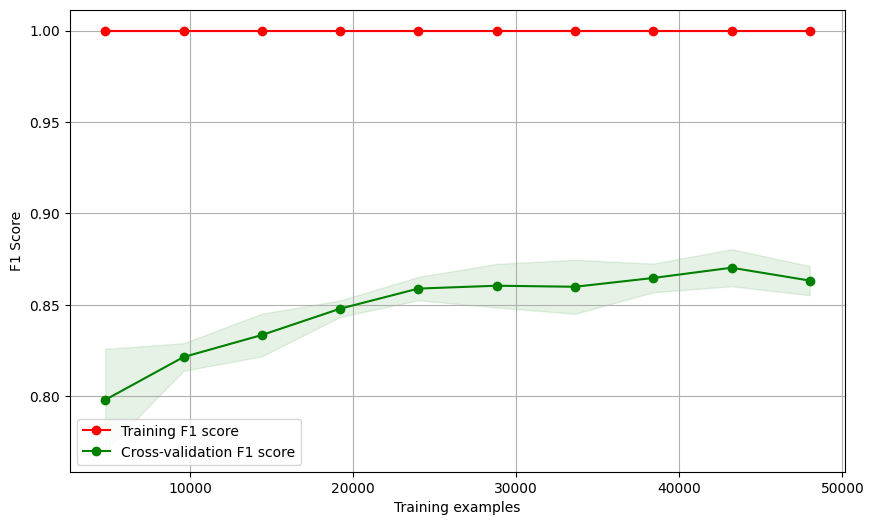

In [184]:
plot_learning_curve(xgb_clf, X_train, y_train,cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

#**Deep Learning Approach**

**Simple Neural Network**

In [185]:
dnnmodel = Sequential([
    Dense(units=16, input_dim = 68, activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [186]:
dnnmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1104      
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2737 (10.69 KB)
Trainable params: 2737 (10

In [187]:
import keras
dnnmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=[keras.metrics.PrecisionAtRecall(
    0.90, num_thresholds=200, class_id=None, name=None, dtype=None
)])
dnnmodel.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
4000/4000 [==============================] - 7s 1ms/step - loss: 0.0572 - precision_at_recall: 0.1292
Epoch 2/5
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0220 - precision_at_recall: 0.6727
Epoch 3/5
4000/4000 [==============================] - 6s 1ms/step - loss: 0.0184 - precision_at_recall: 0.7871
Epoch 4/5
4000/4000 [==============================] - 10s 3ms/step - loss: 0.0173 - precision_at_recall: 0.8012
Epoch 5/5
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0155 - precision_at_recall: 0.8402


In [188]:
score = dnnmodel.evaluate(X_test, y_test)

625/625 [==============================] - 1s 1ms/step - loss: 0.0152 - precision_at_recall: 0.8467


In [189]:
print(score)

[0.015217537060379982, 0.8467153310775757]


In [190]:
y_pred = dnnmodel.predict(X_test)

y_pred = (y_pred>=0.5).astype(int)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

# Calculate the average precision
average_precision = average_precision_score(y_test, y_pred)

# Print the average precision
print('Average Precision:', average_precision)

# Calculate balanced accuracy score
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate Cohen's kappa coefficient
kappa = cohen_kappa_score(y_test, y_pred)

# Print the scores
print("Balanced Accuracy Score:", balanced_acc)
print("Cohen's Kappa Coefficient:", kappa)
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))

625/625 [==============================] - 1s 870us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19614
           1       0.91      0.81      0.86       386

    accuracy                           0.99     20000
   macro avg       0.95      0.91      0.93     20000
weighted avg       0.99      0.99      0.99     20000

Average Precision: 0.7461292203879986
Balanced Accuracy Score: 0.9059709914299345
Cohen's Kappa Coefficient: 0.8576853271898042
roc_auc_score:  0.9059709914299345


Neural Network with undersampling

In [191]:
# Create column names from 1 to 68
column_names = ["Pca"+str(i) for i in range(1, 69)]

X_train = pd.DataFrame(X_train, columns = column_names)
y_train = pd.DataFrame(y_train, columns = ['Target'])


In [192]:
X_train.head()

,Pca1,Pca2,Pca3,Pca4,Pca5,Pca6,Pca7,Pca8,Pca9,Pca10,...,Pca59,Pca60,Pca61,Pca62,Pca63,Pca64,Pca65,Pca66,Pca67,Pca68
0,1.024499,-0.585848,0.002645,-2.999686,0.855088,-0.067702,0.228332,-3.516918,1.218357,-0.172536,...,1.014046,1.413657,-0.485190,-0.983835,0.213084,-0.486769,0.318541,0.591516,-0.215836,-0.397453
1,-0.150892,-0.179904,-2.274043,0.064084,1.042041,-0.157889,0.927134,0.167331,0.365966,-0.237666,...,-0.576190,-1.291043,-0.423873,-0.158465,-0.296913,-0.283846,0.608224,0.374219,-0.241673,0.239515
2,-0.106598,-0.825124,-1.123760,-0.665483,0.884782,0.075311,1.371588,-0.033854,-0.474470,-0.111435,...,0.329383,-0.169609,0.278194,-0.941498,-0.337731,1.194391,-1.250793,-2.076268,-0.670626,0.236637
3,0.539189,-0.778767,1.638803,-1.601187,-0.651089,-0.984813,0.486194,-0.653969,-0.443127,-0.162443,...,-1.140269,-0.206063,1.493143,1.714320,0.547907,0.092396,-0.568405,-0.022949,-2.622498,1.007571
4,-1.377723,-0.563354,-0.821668,2.272686,-0.072285,0.378964,1.562899,-0.552819,0.616155,-0.155477,...,0.090432,0.253669,-0.386607,-0.681684,0.395946,-0.023177,-0.066001,-0.063729,0.576132,-0.236114


In [193]:
y_train.head()

,Target
92471,0
41876,0
41441,0
71696,0
17547,0


In [194]:
y_train = y_train.reset_index(drop=True)

In [195]:
y_train.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [196]:
X_train_df = pd.concat([X_train,y_train],axis=1)

In [197]:
X_train_df

,Pca1,Pca2,Pca3,Pca4,Pca5,Pca6,Pca7,Pca8,Pca9,Pca10,...,Pca60,Pca61,Pca62,Pca63,Pca64,Pca65,Pca66,Pca67,Pca68,Target
0,1.024499,-0.585848,0.002645,-2.999686,0.855088,-0.067702,0.228332,-3.516918,1.218357,-0.172536,...,1.413657,-0.485190,-0.983835,0.213084,-0.486769,0.318541,0.591516,-0.215836,-0.397453,0
1,-0.150892,-0.179904,-2.274043,0.064084,1.042041,-0.157889,0.927134,0.167331,0.365966,-0.237666,...,-1.291043,-0.423873,-0.158465,-0.296913,-0.283846,0.608224,0.374219,-0.241673,0.239515,0
2,-0.106598,-0.825124,-1.123760,-0.665483,0.884782,0.075311,1.371588,-0.033854,-0.474470,-0.111435,...,-0.169609,0.278194,-0.941498,-0.337731,1.194391,-1.250793,-2.076268,-0.670626,0.236637,0
3,0.539189,-0.778767,1.638803,-1.601187,-0.651089,-0.984813,0.486194,-0.653969,-0.443127,-0.162443,...,-0.206063,1.493143,1.714320,0.547907,0.092396,-0.568405,-0.022949,-2.622498,1.007571,0
4,-1.377723,-0.563354,-0.821668,2.272686,-0.072285,0.378964,1.562899,-0.552819,0.616155,-0.155477,...,0.253669,-0.386607,-0.681684,0.395946,-0.023177,-0.066001,-0.063729,0.576132,-0.236114,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-1.309601,-1.068826,-0.544932,1.892140,-0.112496,0.497215,-1.508649,0.487479,0.389154,0.161623,...,0.566882,-0.486724,-0.684513,-0.761578,-0.402668,-0.143699,-0.526075,0.575790,-1.146386,0
59996,-0.982487,-1.400203,-0.269283,0.736822,-0.235721,0.128745,-1.979322,0.704151,0.031867,0.000250,...,0.638587,1.167672,-0.085207,0.314945,1.402186,-2.094064,-0.629736,0.114763,0.406742,0
59997,1.175281,-0.643380,2.604327,-1.247406,1.200646,1.665370,1.637652,-3.433883,0.220855,-0.026499,...,0.236764,-0.573824,-1.189600,0.315723,-0.282729,0.249718,0.164480,0.131941,-0.153901,0
59998,-1.043468,-0.446171,1.346540,0.741004,-1.325233,-0.712438,1.584416,0.460579,-1.079831,-0.081715,...,0.201973,-0.351882,-0.113358,1.122697,0.517610,0.814996,-0.593723,-0.158163,0.014325,0


In [198]:
# Identify the indices of records where Class == 1 (fraudulent transactions)
fraud_indices = np.array(X_train_df[X_train_df['Target'] == 1].index)

# Calculate the number of fraudulent records
number_records_fraud = len(fraud_indices)

# Print the number of fraudulent records
print(number_records_fraud)

1203


In [199]:
normal_indices = X_train_df[X_train_df['Target'] == 0].index
len(normal_indices)

58797

In [200]:
# Random select N indices from non fraudulent samples (N equals to number of fraudulent records)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

1203


In [201]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

2406


In [202]:

under_sample_data = X_train_df.iloc[under_sample_indices,:]

In [203]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Target']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Target']

In [204]:
X_undersample = X_undersample.values

In [205]:
y_undersample = y_undersample.values


In [206]:
dnnmodelus = Sequential([
    Dense(units=16, input_dim = 68, activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [207]:
dnnmodelus.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                1104      
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 24)                600       
                                                                 
 dense_8 (Dense)             (None, 24)                600       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2737 (10.69 KB)
Trainable params: 2737 (

In [208]:
dnnmodelus.compile(optimizer='adam',loss='binary_crossentropy',metrics=[keras.metrics.PrecisionAtRecall(
    0.9, num_thresholds=200, class_id=None, name=None, dtype=None
)])
dnnmodelus.fit(X_undersample,y_undersample,batch_size=15,epochs=5)

Epoch 1/5
161/161 [==============================] - 1s 1ms/step - loss: 0.4899 - precision_at_recall_1: 0.8046
Epoch 2/5
161/161 [==============================] - 0s 1ms/step - loss: 0.2556 - precision_at_recall_1: 0.9576
Epoch 3/5
161/161 [==============================] - 0s 1ms/step - loss: 0.1662 - precision_at_recall_1: 0.9786
Epoch 4/5
161/161 [==============================] - 0s 1ms/step - loss: 0.1219 - precision_at_recall_1: 0.9829
Epoch 5/5
161/161 [==============================] - 0s 1ms/step - loss: 0.1125 - precision_at_recall_1: 0.9840


In [209]:
y_pred = dnnmodelus.predict(X_test)

y_pred = (y_pred>=0.5).astype(int)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

# Calculate the average precision
average_precision = average_precision_score(y_test, y_pred)

# Print the average precision
print('Average Precision:', average_precision)

# Calculate balanced accuracy score
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate Cohen's kappa coefficient
kappa = cohen_kappa_score(y_test, y_pred)

# Print the scores
print("Balanced Accuracy Score:", balanced_acc)
print("Cohen's Kappa Coefficient:", kappa)
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))

625/625 [==============================] - 1s 980us/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     19614
           1       0.43      0.98      0.60       386

    accuracy                           0.97     20000
   macro avg       0.72      0.98      0.79     20000
weighted avg       0.99      0.97      0.98     20000

Average Precision: 0.4249234554468838
Balanced Accuracy Score: 0.9794564895223936
Cohen's Kappa Coefficient: 0.5888055848474129
roc_auc_score:  0.9794564895223936


Neural Network with oversampling using SMOTE

In [210]:
X_resample, y_resample = SMOTE().fit_resample(X_train,y_train.values.ravel())

In [211]:
y_resample

array([0, 0, 0, ..., 1, 1, 1])

In [212]:
print('Number of total transactions before SMOTE upsampling: ', len(y_train), '...after SMOTE upsampling: ', len(y_resample))
print('Number of fraudulent transactions before SMOTE upsampling: ', len(y_train[y_train['Target']==1]),
      '...after SMOTE upsampling: ', np.sum(y_resample[y_resample==1]))

Number of total transactions before SMOTE upsampling:  60000 ...after SMOTE upsampling:  117594
Number of fraudulent transactions before SMOTE upsampling:  1203 ...after SMOTE upsampling:  58797


In [213]:
dnnmodelos = Sequential([
    Dense(units=16, input_dim = 68, activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [214]:
dnnmodelos.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                1104      
                                                                 
 dense_11 (Dense)            (None, 24)                408       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_12 (Dense)            (None, 24)                600       
                                                                 
 dense_13 (Dense)            (None, 24)                600       
                                                                 
 dense_14 (Dense)            (None, 1)                 25        
                                                                 
Total params: 2737 (10.69 KB)
Trainable params: 2737 (

In [215]:
dnnmodelos.compile(optimizer='adam',loss='binary_crossentropy',metrics=[keras.metrics.PrecisionAtRecall(
    0.9, num_thresholds=200, class_id=None, name=None, dtype=None
)])
dnnmodelos.fit(X_resample,y_resample,batch_size=15,epochs=5)

Epoch 1/5
7840/7840 [==============================] - 13s 1ms/step - loss: 0.0728 - precision_at_recall_2: 0.9901
Epoch 2/5
7840/7840 [==============================] - 11s 1ms/step - loss: 0.0367 - precision_at_recall_2: 0.9955
Epoch 3/5
7840/7840 [==============================] - 11s 1ms/step - loss: 0.0291 - precision_at_recall_2: 0.9966
Epoch 4/5
7840/7840 [==============================] - 11s 1ms/step - loss: 0.0243 - precision_at_recall_2: 0.9976
Epoch 5/5
7840/7840 [==============================] - 11s 1ms/step - loss: 0.0206 - precision_at_recall_2: 0.9980


In [216]:
y_pred = dnnmodelos.predict(X_test)

y_pred = (y_pred>=0.5).astype(int)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

# Calculate the average precision
average_precision = average_precision_score(y_test, y_pred)

# Print the average precision
print('Average Precision:', average_precision)

# Calculate balanced accuracy score
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate Cohen's kappa coefficient
kappa = cohen_kappa_score(y_test, y_pred)

# Print the scores
print("Balanced Accuracy Score:", balanced_acc)
print("Cohen's Kappa Coefficient:", kappa)
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))

625/625 [==============================] - 1s 869us/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     19614
           1       0.76      0.94      0.84       386

    accuracy                           0.99     20000
   macro avg       0.88      0.96      0.92     20000
weighted avg       0.99      0.99      0.99     20000

Average Precision: 0.709047004160285
Balanced Accuracy Score: 0.9646595088313255
Cohen's Kappa Coefficient: 0.8330546569581043
roc_auc_score:  0.9646595088313253


#**Evaluating Models On Validation dataset**

In [217]:
# Make predictions on the validation set
y_pred1 = xgb_clf.predict(X_val)
y_pred11 = xgb_clf.predict_proba(X_val)

# Evaluate performance metrics
precision = precision_score(y_val, y_pred1)
recall = recall_score(y_val, y_pred1)
accuracy = accuracy_score(y_val, y_pred1)

# Print the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
# Calculate the average precision
average_precision = average_precision_score(y_val, y_pred1)

# Print the average precision
print('Average Precision:', average_precision)

Precision: 0.8934010152284264
Recall: 0.8564476885644768
Accuracy: 0.99495
Average Precision: 0.7681012344535427


In [218]:
# Make predictions on the validation set
y_pred = rf_classifier.predict(X_val)

# Evaluate performance metrics
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)

# Print the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
# Calculate the average precision
average_precision = average_precision_score(y_val, y_pred)

# Print the average precision
print('Average Precision:', average_precision)

Precision: 0.9300911854103343
Recall: 0.7445255474452555
Accuracy: 0.9936
Average Precision: 0.6977266489916357


In [219]:
# Make predictions on the validation set
y_pred = knn_classifier.predict(X_val)

# Evaluate performance metrics
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)

# Print the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
# Calculate the average precision
average_precision = average_precision_score(y_val, y_pred)

# Print the average precision
print('Average Precision:', average_precision)

Precision: 0.9121813031161473
Recall: 0.7834549878345499
Accuracy: 0.994
Average Precision: 0.7191029917357651


In [220]:
# Make predictions on the validation set
y_pred = svm.predict(X_val)

# Evaluate performance metrics
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)

# Print the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
# Calculate the average precision
average_precision = average_precision_score(y_val, y_pred)

# Print the average precision
print('Average Precision:', average_precision)

Precision: 0.9285714285714286
Recall: 0.7274939172749392
Accuracy: 0.99325
Average Precision: 0.681130066041015


In [221]:
# Make predictions on the validation set #n_components = 69
y_pred12 = dnnmodel.predict(X_val)
y_pred2 = (y_pred12>=0.5).astype(int)

# Evaluate performance metrics
precision = precision_score(y_val, y_pred2)
recall = recall_score(y_val, y_pred2)
accuracy = accuracy_score(y_val, y_pred2)

# Print the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
# Calculate the average precision
average_precision = average_precision_score(y_val, y_pred2)

# Print the average precision
print('Average Precision:', average_precision)

625/625 [==============================] - 1s 920us/step
Precision: 0.9054054054054054
Recall: 0.8150851581508516
Accuracy: 0.99445
Average Precision: 0.7417825080555007


In [222]:
# Make predictions on the validation set
y_pred = dnnmodelus.predict(X_val)
y_pred = (y_pred>=0.5).astype(int)

# Evaluate performance metrics
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)

# Print the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
# Calculate the average precision
average_precision = average_precision_score(y_val, y_pred)

# Print the average precision

print('Average Precision:', average_precision)

625/625 [==============================] - 1s 903us/step
Precision: 0.43398268398268397
Recall: 0.975669099756691
Accuracy: 0.97335
Average Precision: 0.4239234945913778


In [223]:
# Make predictions on the validation set
y_pred = dnnmodelos.predict(X_val)
y_pred = (y_pred>=0.5).astype(int)

# Evaluate performance metrics
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)

# Print the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
# Calculate the average precision
average_precision = average_precision_score(y_val, y_pred)

# Print the average precision
print('Average Precision:', average_precision)

625/625 [==============================] - 1s 885us/step
Precision: 0.7298850574712644
Recall: 0.927007299270073
Accuracy: 0.99145
Average Precision: 0.6781087759040187


In [224]:
y_pred11[:,1]

array([1.1889751e-08, 8.1769088e-08, 2.8297459e-04, ..., 2.3300063e-07,
       1.6687066e-07, 6.2826210e-08], dtype=float32)

In [225]:
y_pred12[:,0]

array([4.02206554e-16, 2.22465912e-09, 1.11010704e-04, ...,
       2.94169181e-12, 5.08838367e-16, 1.75469980e-15], dtype=float32)

In [226]:
# Save the trained model to a file
joblib.dump(xgb_clf, 'xgb_clf.pkl')

['xgb_clf.pkl']

In [227]:
# Save the trained model to a file
joblib.dump(dnnmodel, 'dnnmodel.pkl')

['dnnmodel.pkl']

#**Ensemble Model**


**XGB_clf + Simple NN**

In [228]:
y_final = (y_pred11[:,1] + y_pred12[:,0])/2
# Make predictions on the validation set

y_final = (y_final>=0.5).astype(int)

# Evaluate performance metrics
precision = precision_score(y_val, y_final)
recall = recall_score(y_val, y_final)
accuracy = accuracy_score(y_val, y_final)

# Print the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
# Calculate the average precision
average_precision = average_precision_score(y_val, y_final)

# Print the average precision
print('Average Precision:', average_precision)

Precision: 0.9043927648578811
Recall: 0.851581508515815
Accuracy: 0.9951
Average Precision: 0.7732141549884632


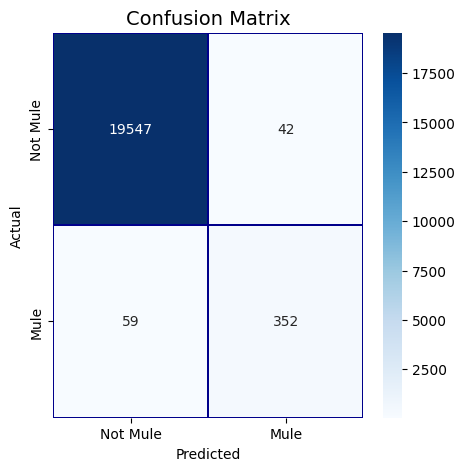

In [229]:
# Compute confusion matrix XGB Clf
cm = pd.crosstab(y_val, y_pred1, rownames=['Actual'], colnames=['Predicted'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Mule', 'Mule'],
            yticklabels=['Not Mule', 'Mule'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt ="d")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [230]:
y_pred2.flatten()

array([0, 0, 0, ..., 0, 0, 0])

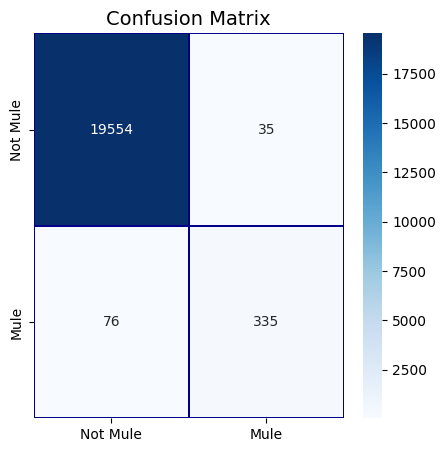

In [231]:
# Compute confusion matrix  DNN simple
cm= confusion_matrix(y_val,y_pred2)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
ax1.set_xlabel("Predicted")
ax1.set_ylabel("Actual")
sns.heatmap(cm,
            xticklabels=['Not Mule', 'Mule'],
            yticklabels=['Not Mule', 'Mule'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt ="d")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

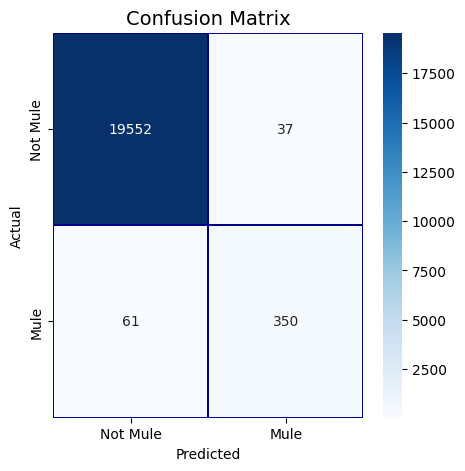

In [232]:
# Compute confusion matrix Ensemble
cm = pd.crosstab(y_val, y_final, rownames=['Actual'], colnames=['Predicted'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Mule', 'Mule'],
            yticklabels=['Not Mule', 'Mule'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt ="d")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

#**Getting the output on the Validation Dataset**

In [ ]:
xgb_model = load('xgb_clf.pkl')

In [ ]:
dnn_model = load('dnnmodel.pkl')

In [ ]:
prob1 = xgb_model.predict_proba(vl_df)
prob2 = dnn_model.predict(vl_df)

1563/1563 [==============================] - 3s 2ms/step


In [ ]:
prob1

array([[9.99915719e-01, 8.42265508e-05],
       [1.00000000e+00, 1.37692995e-08],
       [9.99999523e-01, 5.06184222e-07],
       ...,
       [7.98935294e-01, 2.01064661e-01],
       [1.20870277e-01, 8.79129708e-01],
       [2.48143941e-01, 7.51856089e-01]], dtype=float32)

In [ ]:
prob2

array([[1.9771087e-06],
       [1.5350777e-08],
       [7.9468188e-10],
       ...,
       [3.8009621e-02],
       [9.8207420e-01],
       [6.1350560e-01]], dtype=float32)

Using the mean probabilities of the xgb model as well as the neural network

In [ ]:
primary_keys = val_df['Primary key']  # Store the primary keys for later use

# Predict probabilities for the validation data
probabilities = (prob1[:,1] + prob2[:,0])/2 # Assuming the second column contains the probabilities for class 1 (money mule)

# Create a DataFrame with primary key and predicted probabilities
results_df = pd.DataFrame({'Primary Key': primary_keys, 'Probabilities': probabilities})

# Add a new column 'Predicted_Target' based on the predicted probabilities
results_df['Target Values'] = (probabilities > 0.5).astype(int)  # Assign 1 if probability > 0.5, else 0




In [ ]:
results_df

,Primary Key,Probabilities,Target Values
0,9000001,4.310183e-05,0
1,9000002,1.456004e-08,0
2,9000003,2.534894e-07,0
3,9000004,7.568244e-06,0
4,9000005,7.136440e-06,0
...,...,...,...
49995,9049996,2.607332e-01,0
49996,9049997,3.461185e-01,0
49997,9049998,1.195371e-01,0
49998,9049999,9.306020e-01,1


In [ ]:
results_df['Target Values'].value_counts()

0    49482
1      518
Name: Target Values, dtype: int64

In [ ]:
# Save the results to an Excel file
results_df.to_csv('predictions.xlsx', index=False)